In [1]:
!python -V
!pip show jupyterlab pandas plotly cufflinks seaborn openpyxl itables lxml pyarrow pip

Python 3.10.7
Name: jupyterlab
Version: 3.4.8
Summary: JupyterLab computational environment
Home-page: https://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: 
Location: c:\z_github_virtual_environment\ambiente_notebooks\lib\site-packages
Requires: ipython, jinja2, jupyter-core, jupyter-server, jupyterlab-server, nbclassic, notebook, packaging, tomli, tornado
Required-by: 
---
Name: pandas
Version: 1.5.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\z_github_virtual_environment\ambiente_notebooks\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: cufflinks, itables, seaborn
---
Name: plotly
Version: 5.11.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: 

# <center>**LIBRERIAS Y FUNCIONES**</center>

In [2]:
# garbage colector para liberar recursos de variables usadas
import gc as garbage_colector

# ocultar los warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
# configura el maximo de filas y columnas a mostrar en el dataframe, en este caso TODAS LAS FILAS Y COLUMNAS
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# muestra todo el contenido de la fila en el dataframe por muy extenso que sea el contenido
pd.set_option('display.max_colwidth', None)


import random

# configura las tablas interactivas
#from itables import init_notebook_mode

#init_notebook_mode(all_interactive=True)

# importa las funciones para crear los dataframes de los archivos locales
from utilidades import crear_dataframes, join_dataframe

df1, df2, df3 = crear_dataframes(limite_muestra = 100)

# <center>**LEER ARCHIVOS Y CONVERTIRLOS EN DATAFRAME**</center>

# <center>**JSON**</center>

In [3]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/json_dataframe.json'
json = pd.read_json(archivo)
json

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


# <center>**CSV**</center>

In [4]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/csv_dataframe.csv'
csv = pd.read_csv(archivo)
csv

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,6,92,Celacantos (extintos),Curilla o aceitera,Cocodrilo,Gorila,Toro
6,7,58,Anguilas de mar,Moscas domésticas,Abeja,Conejo del campo,Oryx
7,8,21,Bacalaos,Mariposa macaón,Pato,Zorro volador,Sambar
8,9,70,Microsaurios (extintos),Mariposa pavo real,Águila,Zarigüeya,Reno
9,10,86,Basiliscos,Moscas cernícalo,Avestruz,Tupaya enana,Niala


# <center>**EXCEL**</center>

In [5]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/excel_dataframes.xlsx'
pd.read_excel(archivo, engine="openpyxl")

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,1,Chimpancés,Tortugas acuáticas,Los tiburones ballena,Ranas arcoíris,Gallinas
1,2,28,Chimpancés,Camaleones,Tiburones,Ajolotes,Loros
2,3,93,Vacas,Tortugas acuáticas,Tiburones,Salamandras comunes,Gaviotas
3,4,31,Ratones,Pterosaurios (extintos),Tiburones,Ranas arcoíris,Tucanes
4,5,32,Ballenas,Tortugas acuáticas,Peces payaso,Gallipatos,Gaviotas
5,6,59,Perros,Lagartos voladores australianos,Carpas,Ajolotes,Faisanes
6,7,58,Canguros,Pterosaurios (extintos),Peces globo,Ranas arborícolas,Pavos
7,8,67,Caballos,Lagartijas comunes,Peces vela,Sapos comunes,Pelícanos
8,9,5,Delfines,Dragones de Komodo,Peces abisales,Necturos,Pavorreales
9,10,66,Jirafas,Camaleones,Pirañas,Lisorofios (extintos),Pájaros carpinteros


In [6]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/excel_dataframes.xlsx'
excel = pd.read_excel(archivo, engine="openpyxl", sheet_name='dataframe_3')
excel

,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros
0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal
1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón
2,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí
3,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria
4,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo
5,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé
6,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo
7,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono
8,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña
9,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo


# <center>**HTML**</center>

In [7]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/html_dataframe.html'
pd.read_html(archivo, encoding="UTF-8")[0]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


# <center>**PARQUET**</center>

In [8]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/parquet_dataframe.parquet'
pd.read_parquet(archivo)

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,6,92,Celacantos (extintos),Curilla o aceitera,Cocodrilo,Gorila,Toro
6,7,58,Anguilas de mar,Moscas domésticas,Abeja,Conejo del campo,Oryx
7,8,21,Bacalaos,Mariposa macaón,Pato,Zorro volador,Sambar
8,9,70,Microsaurios (extintos),Mariposa pavo real,Águila,Zarigüeya,Reno
9,10,86,Basiliscos,Moscas cernícalo,Avestruz,Tupaya enana,Niala


# <center>LIBERAMOS LOS RECURSOS USADOS POR LOS CONTENIDOS DE LAS VARIABLES QUE YA NO SE VAN A USAR**</center>

In [9]:
df1, df2, df3 = json, csv, excel
del excel
del csv
del json
del archivo
garbage_colector.collect(), garbage_colector.get_threshold()

(118, (700, 10, 10))

# <center>GUARDAR DATAFRAME A **JSON, CVS, EXCEL, HTML, PARQUET**</center>

In [10]:
df1.to_json('archivos/json_dataframe.json', orient ='records', indent=2)
df2.to_csv('archivos/csv_dataframe.csv', index=False)
df3.to_excel('archivos/excel_dataframe.xlsx', index=False, sheet_name='dataframe_1')
df1.to_html('archivos/html_dataframe.html', index=False)
df2.to_parquet('archivos/parquet_dataframe.parquet', index=False)

## <center>**PRINT VS DISPLAY**</center>

In [11]:
print(df1, df2)

     Id  Lider      Mamíferos                         Reptiles  \
0     1     42          Vacas  Lagartos voladores australianos   
1     2     32     Chimpancés                       Camaleones   
2     3     41         Leones                       Cocodrilos   
3     4     94          Vacas               Lagartijas comunes   
4     5     14        Ratones                          Iguanas   
5     6     32         Hienas                          Iguanas   
6     7     36         Leones                         Luciones   
7     8      7       Caballos               Tortugas galápagos   
8     9    100       Ballenas               Lagartijas comunes   
9    10     93  Seres humanos              Tortugas terrestres   
10   11     99          Orcas               Dragones de Komodo   
11   12     90     Chimpancés                          Víboras   
12   13     17   Rinocerontes                       Cocodrilos   
13   14      1        Gorilas           Dinosaurios (extintos)   
14   15   

In [12]:
display(df1, df2)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,6,92,Celacantos (extintos),Curilla o aceitera,Cocodrilo,Gorila,Toro
6,7,58,Anguilas de mar,Moscas domésticas,Abeja,Conejo del campo,Oryx
7,8,21,Bacalaos,Mariposa macaón,Pato,Zorro volador,Sambar
8,9,70,Microsaurios (extintos),Mariposa pavo real,Águila,Zarigüeya,Reno
9,10,86,Basiliscos,Moscas cernícalo,Avestruz,Tupaya enana,Niala


# <center>**SERIES VS DATAFRAME**</center>
### <center>**LAS SERIES ACTUAN COMO UNA LISTA CON INDICES UNIDIMENSIONALES ASOCIADOS A UNA COLUMNA**</center>
<center><img src="series_vs_dataframes.png"/></center>

In [13]:
materias = ['Matemáticas','Economía','Programación','Deportes','Artes']
notas = [6.0, 10, 8.5, 10, 9.3]
pd.Series(materias)

0     Matemáticas
1        Economía
2    Programación
3        Deportes
4           Artes
dtype: object

In [14]:
pd.Series(notas)

0     6.0
1    10.0
2     8.5
3    10.0
4     9.3
dtype: float64

### <center>**DEFINIENDO EL INDICE Y EL NOMBRE DE LA COLUMNA**</center>

In [15]:
pd.Series(data=notas, index=materias)

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
dtype: float64

In [16]:
pd.Series(data=notas, index=materias, name='Nota')

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**USANDO DICCIONARIOS**</center>

In [17]:
serie = pd.Series(data={'Matemáticas': 6.0,  'Economía': 10, 'Programación': 8.5, 'Deportes': 10, 'Artes': 9.3}, name='Nota')
print(type(serie))
serie

<class 'pandas.core.series.Series'>


Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**USANDO COLUMNAS DE DATAFRAMES**</center>
#### <center>**INDEX COMO UNA SOLA COLUMNA DE UN DATAFRAME Y COLUMNA COMO LISTA**</center>

In [18]:
colores= {'AMARILLO':[1,None,2,3,None,3,4,None,None,1],
'AZUL':[5,None,None,None,None,10,15,20,25,None],
'ROJO':[2,None,5,10,15,20,7,31,None,None],
'VERDE':[4,None,None,None,None,None,None,None,None,None],
'ROSADO':[3,6,9,12,15,18,21,24,27,30]}

for key, value in colores.items():
    print(key, len(value), value)
    
df_colores = pd.DataFrame(colores)
df_colores

AMARILLO 10 [1, None, 2, 3, None, 3, 4, None, None, 1]
AZUL 10 [5, None, None, None, None, 10, 15, 20, 25, None]
ROJO 10 [2, None, 5, 10, 15, 20, 7, 31, None, None]
VERDE 10 [4, None, None, None, None, None, None, None, None, None]
ROSADO 10 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


In [19]:
pd.Series(index=df_colores.AZUL, data= df_colores.ROSADO.to_list(), name='VALORES DE ROSADO')

AZUL
5.0      3
NaN      6
NaN      9
NaN     12
NaN     15
10.0    18
15.0    21
20.0    24
25.0    27
NaN     30
Name: VALORES DE ROSADO, dtype: int64

### <center>**COLUMNA DE DATAFRAME A SERIE**</center>

In [20]:
df_colores.AMARILLO

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
5    3.0
6    4.0
7    NaN
8    NaN
9    1.0
Name: AMARILLO, dtype: float64

### <center>**FILA DE DATAFRAME A SERIE**</center>

In [21]:
df_colores.iloc[0]

AMARILLO    1.0
AZUL        5.0
ROJO        2.0
VERDE       4.0
ROSADO      3.0
Name: 0, dtype: float64

### <center>**CONVERTIR SERIE A DATAFRAME**</center>

In [22]:
df_colores.iloc[0].to_frame().rename({0:'Total Valores Nulos'}, axis='columns')

,Total Valores Nulos
AMARILLO,1.0
AZUL,5.0
ROJO,2.0
VERDE,4.0
ROSADO,3.0


### <center>**ATRIBUTOS DE LAS SERIES**</center>

In [23]:
serie.shape

(5,)

In [24]:
serie.size

5

In [25]:
serie.dtype

dtype('float64')

In [26]:
serie.index

Index(['Matemáticas', 'Economía', 'Programación', 'Deportes', 'Artes'], dtype='object')

In [27]:
serie.values

array([ 6. , 10. ,  8.5, 10. ,  9.3])

In [28]:
serie.value_counts()

10.0    2
6.0     1
8.5     1
9.3     1
Name: Nota, dtype: int64

In [29]:
serie.sort_index(ascending=False)

Programación     8.5
Matemáticas      6.0
Economía        10.0
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

# <center>**ACCESO A DATOS DE LAS SERIES**</center>

### <center>**POR INDICE**</center>

In [30]:
serie['Deportes']

10.0

In [31]:
serie.Deportes

10.0

In [32]:
serie[3]

10.0

### <center>**POR RANGO ENTRE INDICES**</center>

In [33]:
display(serie)
serie['Programación':'Artes']

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

In [34]:
serie[2:5]

Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**POR INDICES ESPECIFICOS**</center>

In [35]:
serie[['Matemáticas','Programación','Artes']]

Matemáticas     6.0
Programación    8.5
Artes           9.3
Name: Nota, dtype: float64

In [36]:
serie[[0,2,4]]

Matemáticas     6.0
Programación    8.5
Artes           9.3
Name: Nota, dtype: float64

### <center>**ANALISIS DE DATOS**</center>

In [37]:
serie

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

In [38]:
# argmax posicion o indice donde encontro el valor maximo
serie.max(), serie.argmax()

(10.0, 1)

In [39]:
serie.min(), serie.argmin()

(6.0, 0)

In [40]:
serie.quantile(0.25), serie.mean(), serie.median(), serie.mode()

(8.5,
 8.76,
 9.3,
 0    10.0
 Name: Nota, dtype: float64)

In [41]:
serie.std(), serie.sum(), serie.count(), serie.abs()

(1.6622274212634083,
 43.8,
 5,
 Matemáticas      6.0
 Economía        10.0
 Programación     8.5
 Deportes        10.0
 Artes            9.3
 Name: Nota, dtype: float64)

In [42]:
serie.describe()

count     5.000000
mean      8.760000
std       1.662227
min       6.000000
25%       8.500000
50%       9.300000
75%      10.000000
max      10.000000
Name: Nota, dtype: float64

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

<AxesSubplot: >

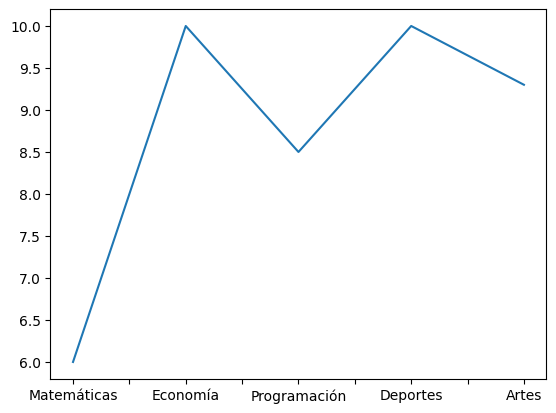

In [43]:
display(serie)
serie.plot()

# <center>DATAFRAMES</center>
## <center>OBTENER LOS TAMAÑOS DE UN DATAFRAME</center>

In [44]:
print(f'Cantidad de filas y columnas {df_colores.shape}')
print(f'Cantidad de filas {df_colores.shape[0]}')
print(f'Cantidad de columnas {df_colores.shape[1]}')
df_colores

Cantidad de filas y columnas (10, 5)
Cantidad de filas 10
Cantidad de columnas 5


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


# <center>**OBTENER EL RESUMEN DE LAS COLUMNAS DE UN DATAFRAME**</center>
## <center>**SOLO VALORES NO NULL**</center>

In [45]:
df_colores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AMARILLO  6 non-null      float64
 1   AZUL      5 non-null      float64
 2   ROJO      7 non-null      float64
 3   VERDE     1 non-null      float64
 4   ROSADO    10 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [46]:
df_colores.describe()

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
count,6.000000,5.000000,7.000000,1.0,10.000000
mean,2.333333,15.000000,12.857143,4.0,16.500000
std,1.211060,7.905694,10.056981,NaN,9.082951
min,1.000000,5.000000,2.000000,4.0,3.000000
25%,1.250000,10.000000,6.000000,4.0,9.750000
50%,2.500000,15.000000,10.000000,4.0,16.500000
75%,3.000000,20.000000,17.500000,4.0,23.250000
max,4.000000,25.000000,31.000000,4.0,30.000000


# <center>OBTENER LA DEFINICION DE LOS EJES DE UN DATAFRAME</center>

In [47]:
df_colores.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO'], dtype='object')]

# <center>OBTENER LOS NOMBRES DE LAS COLUMNAS DE UN DATAFRAME</center>

In [48]:
df_colores.columns.to_list()

['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO']

In [49]:
list(df_colores.keys())

['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO']

# <center>OBTENER LOS DATOS COMPLETOS DE UNA **COLUMNA** DE UN DATAFRAME</center>

In [50]:
df_colores.AMARILLO

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
5    3.0
6    4.0
7    NaN
8    NaN
9    1.0
Name: AMARILLO, dtype: float64

In [51]:
df_colores['AMARILLO']

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
5    3.0
6    4.0
7    NaN
8    NaN
9    1.0
Name: AMARILLO, dtype: float64

In [52]:
df_colores.AMARILLO.values

array([ 1., nan,  2.,  3., nan,  3.,  4., nan, nan,  1.])

In [53]:
df_colores.AMARILLO.to_list()

[1.0, nan, 2.0, 3.0, nan, 3.0, 4.0, nan, nan, 1.0]

# <center>**OBTENER LOS VALORES 'DISTINTOS' UNICOS(SIN REPETIR) DE UNA FILA** UNIQUE - NUNIQUE</center>

In [54]:
print(df_colores.AMARILLO.unique())
df_colores

[ 1. nan  2.  3.  4.]


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


## **NUNIQUE** obtiene el total de datos unicos incluso de TODO EL DATAFRAME

### POR COLUMNA

In [55]:
df_colores.AMARILLO.nunique()

4

In [56]:
df_colores.AMARILLO.nunique(dropna=False)

5

### TODO EL DATAFRAME

In [57]:
df_colores.nunique(dropna=False)

AMARILLO     5
AZUL         6
ROJO         8
VERDE        2
ROSADO      10
dtype: int64

In [58]:
df_colores.nunique()

AMARILLO     4
AZUL         5
ROJO         7
VERDE        1
ROSADO      10
dtype: int64

# Total valores unicos por fila, incluyendo NaN

In [59]:
display(df_colores.reset_index())
display(df_colores.nunique(axis=1).reset_index(name='Total por fila Excluyendo Null'))
display(df_colores.nunique(axis=1, dropna=False).reset_index(name='Total por fila Incluyendo Null'))

,index,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,0,1.0,5.0,2.0,4.0,3
1,1,NaN,NaN,NaN,NaN,6
2,2,2.0,NaN,5.0,NaN,9
3,3,3.0,NaN,10.0,NaN,12
4,4,NaN,NaN,15.0,NaN,15
5,5,3.0,10.0,20.0,NaN,18
6,6,4.0,15.0,7.0,NaN,21
7,7,NaN,20.0,31.0,NaN,24
8,8,NaN,25.0,NaN,NaN,27
9,9,1.0,NaN,NaN,NaN,30


,index,Total por fila Excluyendo Null
0,0,5
1,1,1
2,2,3
3,3,3
4,4,1
5,5,4
6,6,4
7,7,3
8,8,2
9,9,2


,index,Total por fila Incluyendo Null
0,0,5
1,1,2
2,2,4
3,3,4
4,4,2
5,5,5
6,6,5
7,7,4
8,8,3
9,9,3


# <center>**CONTAR VALORES NOT NULL DE UNA COLUMNA**</center>

In [60]:
print(df_colores.AMARILLO.values)
df_colores.AMARILLO.value_counts()

[ 1. nan  2.  3. nan  3.  4. nan nan  1.]


1.0    2
3.0    2
2.0    1
4.0    1
Name: AMARILLO, dtype: int64

# <center>**RESALTAR VALORES NUMERICOS DE UN DATAFRAME SEGUN SU PORCENTAJE EN VALOR**</center>

### crear dataframe de diccionario

In [359]:
insight = {
'Uno':[random.randint(1, 11) * 3 for valor in range(10)],
'Dos':[random.randint(1, 11) * 7 for valor in range(10)],
'Tres':[random.randint(1, 11) * 5 for valor in range(10)],
'Cuatro':[random.randint(1, 11) * 31 for valor in range(10)],
'Cinco':[random.randint(1, 11) * 13 for valor in range(10)],
}

df_estilo_colores = pd.DataFrame.from_dict(insight)
df_estilo_colores

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


### intensidad por fila

In [360]:
df_estilo_colores.style.background_gradient(axis=0, cmap="YlOrRd")

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


### intensidad por columna

In [361]:
df_estilo_colores.style.background_gradient(axis=1, cmap="YlOrRd")

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


### intensidad por todos los datos

In [362]:
df_estilo_colores.style.background_gradient(axis=None, cmap="YlOrRd")

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


### intensidad modulada

In [363]:
df_estilo_colores.style.background_gradient(axis=None, cmap="YlOrRd", low=0.25, high=1.0)

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


### intensidad del color definida para cada elemento de una fila

In [364]:
valores = [[random.randint(1,5) for valor in range(df_estilo_colores.shape[1])] for x in range(df_estilo_colores.shape[0])]
print(valores)
df_estilo_colores.style.background_gradient(axis=None, cmap="YlOrRd", low=0.25, high=1.0, gmap=np.array(valores))

[[4, 2, 4, 4, 2], [5, 2, 2, 4, 3], [4, 4, 3, 4, 5], [5, 5, 3, 1, 3], [3, 5, 3, 5, 5], [3, 5, 3, 5, 5], [4, 2, 4, 4, 3], [3, 5, 2, 5, 1], [2, 3, 5, 5, 2], [3, 5, 1, 1, 5]]


,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


### resaltar valores maximos y minimos de una fila o columna

In [367]:
df_estilo_colores.style.highlight_max(color="red")

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


In [370]:
df_estilo_colores.style.highlight_min(color="green", axis=0)

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


In [372]:
df_estilo_colores.style.highlight_min(color="pink", axis=None)

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


In [374]:
df_estilo_colores.style.highlight_max(color="pink", axis=None)

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


In [380]:
df_estilo_colores.style.highlight_between(left=15, right=31)

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


In [385]:
df_estilo_colores.style.highlight_quantile(8)

,Uno,Dos,Tres,Cuatro,Cinco
0,15,70,40,341,91
1,24,7,15,93,52
2,18,28,20,93,104
3,15,42,50,341,91
4,33,21,25,155,65
5,27,28,30,186,104
6,15,35,55,124,52
7,27,56,25,279,91
8,18,56,45,31,143
9,21,14,10,124,117


# <center>**CONTAR VALORES NOT NULL DE UNA COLUMNA Y LISTAR LOS n VALORES REQUERIDOS DE MAYOR A MENOR o DE MENOR A MAYOR**</center>

### <center>**LISTAR LOS n PRIMEROS VALORES REQUERIDOS Y LISTARLOS DE MAYOR A MENOR**</center>

In [61]:
df1.Anfibios.value_counts().head(3)

Lisorofios (extintos)     9
Ranas de Seychelles       9
Salamandras sin pulmón    8
Name: Anfibios, dtype: int64

In [62]:
df1.Anfibios.value_counts().head(5)

Lisorofios (extintos)     9
Ranas de Seychelles       9
Salamandras sin pulmón    8
Ajolotes                  7
Cecilias                  7
Name: Anfibios, dtype: int64

### <center>**LISTAR LOS n ULTIMOS VALORES REQUERIDOS Y LISTARLOS DE MAYOR A MENOR**</center>

In [63]:
df1.Anfibios.value_counts().tail(5)

Salamandras gigantes chinas    3
Sapos corredores               3
Ranas toro africanas           2
Salamandras comunes            2
Microsaurios (extintos)        1
Name: Anfibios, dtype: int64

### <center>**OBTENER LA LISTA CON LOS 'INDICES' VALORES DE LOS n PRIMEROS o ULTIMOS VALORES REQUERIDOS DE MAYOR A MENOR o DE MENOR A MAYOR**</center>

In [64]:
df1.Anfibios.value_counts().head(10).index.to_list()

['Lisorofios (extintos)',
 'Ranas de Seychelles',
 'Salamandras sin pulmón',
 'Ajolotes',
 'Cecilias',
 'Ranas de Darwin',
 'Sapos gigantes',
 'Necturos',
 'Proteos',
 'Ranas venenosas']

In [65]:
df1.Anfibios.value_counts().tail(10).index.to_list()

['Ranas arborícolas',
 'Gallipatos',
 'Ranas arcoíris',
 'Sapos comunes',
 'Sapos de caña venenosos',
 'Salamandras gigantes chinas',
 'Sapos corredores',
 'Ranas toro africanas',
 'Salamandras comunes',
 'Microsaurios (extintos)']

### <center>**OBTENER LA LISTA CON LOS 'VALORES' DE LOS n PRIMEROS o ULTIMOS VALORES REQUERIDOS DE MAYOR A MENOR o DE MENOR A MAYOR**</center>

In [66]:
list(df1.Anfibios.value_counts().head(10).values)

[9, 9, 8, 7, 7, 7, 6, 5, 5, 5]

In [67]:
list(df1.Anfibios.value_counts().tail(10).values)

[5, 5, 4, 4, 3, 3, 3, 2, 2, 1]

### <center>**CONOCER EL TIPO DE DATOS DE CADA COLUMNA EN UN DATAFRAME Y ELIMINAR O SELECCIONAR LAS COLUMNAS BASADO EN EL TIPO DE DATO**</center>
<center><img src="pandas_data_types.png"/></center>

In [68]:
df1.dtypes

Id            int64
Lider         int64
Mamíferos    object
Reptiles     object
Peces        object
Anfibios     object
Aves         object
dtype: object

# Seleccionar solo las columnas con estos tipos de datos

In [69]:
df1.select_dtypes(include=['int64']).columns.to_list()

['Id', 'Lider']

# Eliminar columnas con diferentes tipos de datos

In [70]:
df1.select_dtypes(exclude=['int64']).columns.to_list()

['Mamíferos', 'Reptiles', 'Peces', 'Anfibios', 'Aves']

## <center>**GENERAR Y PERSONALIZAR INDICES BASADOS EN COLUMNAS**</center>

In [71]:
dfx = df1
dfx.head()

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes


# Indice Sencillo

In [72]:
from math import ceil

nombres_columnas = dfx.select_dtypes(exclude=['int64']).columns.to_list()
indice_aleatorio = random.choice(nombres_columnas)
multiples_indices_aleatorios = random.sample(nombres_columnas, ceil(len(nombres_columnas)/2))
dfx_1 = dfx.set_index(indice_aleatorio)
print(f'indice_aleatorio -> {indice_aleatorio}')
print(f'multiples_indices_aleatorios -> {multiples_indices_aleatorios}')
dfx_1.head()

indice_aleatorio -> Anfibios
multiples_indices_aleatorios -> ['Reptiles', 'Mamíferos', 'Peces']


,Id,Lider,Mamíferos,Reptiles,Peces,Aves
Anfibios,,,,,,
Cecilias,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Guacamayas
Gallipatos,2,32,Chimpancés,Camaleones,Atunes,Loros
Ranas de Seychelles,3,41,Leones,Cocodrilos,Carpas,Buitres
Salamandras gigantes chinas,4,94,Vacas,Lagartijas comunes,Koi japoneses,Pelícanos
Ranas de Darwin,5,14,Ratones,Iguanas,Celacantos (extintos),Tucanes


# Indice Multiple

In [73]:
#init_notebook_mode(all_interactive=False)
print(f'multiples_indices_aleatorios -> {multiples_indices_aleatorios}')
dfx_2 = dfx.set_index(multiples_indices_aleatorios).sort_values(multiples_indices_aleatorios)
dfx_2

multiples_indices_aleatorios -> ['Reptiles', 'Mamíferos', 'Peces']


Id  \
Reptiles                        Mamíferos     Peces                        
Aligátores                      Delfines      Peces abisales          35   
                                              Tiburones               59   
                                Elefantes     Pirañas                 84   
                                Leones        Celacantos (extintos)   85   
                                Ovejas        Barracudas              90   
                                Vacas         Esturiones              20   
Basiliscos                      Orcas         Tiburones               26   
                                Rinocerontes  Koi japoneses           73   
                                Seres humanos Lenguados               18   
                                Vacas         Barracudas              91   
Boas constrictoras              Caballos      Lenguados               51   
                                Elefantes     Peces payaso            17   
                                Ovejas        Koi japoneses           71   
                                Perros        Tiburones               80   
                                Ratones       Bacalaos                23   
Camaleones                      Capibaras     Las agujas de río       34   
                                Chimpancés    Atunes                   2   
                                Hienas        Esturiones              63   
                                Jirafas       Bacalaos                52   
                                Perros        Peces sapo              87   
                                Ratones       Atunes                  79   
Cocodrilos                      Canguros      Atunes                  46   
                                              Peces abisales          98   
                                Jirafas       Esturiones              55   
                                              Lenguados               82   
                                Leones        Carpas                   3   
                                Rinocerontes  Carpas                  13   
                                              Peces abisales          97   
Dinosaurios (extintos)          Gorilas       Peces payaso            14   
                                Ovejas        Esturiones              72   
                                Seres humanos Peces abisales          43   
Dragones de Komodo              Orcas         Carpas                  11   
                                Rinocerontes  Las agujas de río       64   
Iguanas                         Capibaras     Anguilas de mar         50   
                                Elefantes     Anguilas de mar         29   
                                Hienas        Peces payaso             6   
                                Orcas         Peces abisales          31   
                                Ratones       Celacantos (extintos)    5   
                                Seres humanos Barracudas              75   
                                Vacas         Los tiburones ballena   57   
Lagartijas comunes              Ballenas      Anguilas de mar          9   
                                              Atunes                  22   
                                              Atunes                  44   
                                Canguros      Barracudas              47   
                                Ovejas        Koi japoneses           88   
                                Vacas         Koi japoneses            4   
Lagartos voladores australianos Cabras        Bacalaos                32   
                                Chimpancés    Bacalaos                76   
                                Leones        Lenguados               62   
                                Ovejas        Peces globo             54   
                                Vacas         Koi japoneses            1   
Luciones                        Caballos  

In [74]:
def extraer_los_elementos_de_una_posicion_especifica_de_una_lista_de_tuplas(dataset, posicion_especifica=0):
    
    listado_de_indices = dataset.index.to_list()
    indices_principales = list(set(list(zip(*listado_de_indices))[posicion_especifica]))
    
    return indices_principales

# obtiene el listado con los valores del primer indice
print(extraer_los_elementos_de_una_posicion_especifica_de_una_lista_de_tuplas(dfx_2, posicion_especifica=0))

['Dinosaurios (extintos)', 'Víboras', 'Aligátores', 'Tortugas acuáticas', 'Cocodrilos', 'Iguanas', 'Tortugas terrestres', 'Dragones de Komodo', 'Lagartijas comunes', 'Camaleones', 'Mosasaurios (extintos)', 'Luciones', 'Tortugas galápagos', 'Tuátaras de Nueva Zelanda', 'Lagartos voladores australianos', 'Boas constrictoras', 'Basiliscos', 'Varanos', 'Pterosaurios (extintos)', 'Monstruos de Gila']


## <center>CONSULTAR RAPIDA BASADA EN INDICES CON **XS CROSS SECTION** BASADO EN EL ORDEN Y LOS VALORES DE LOS INDICES</center>

In [80]:
def listar_elementos_por_indice_sin_repetir(dataset):
    
    columnas_dataset = dataset.columns.to_list()
    
    indices_aleatorios = list(dataset.to_dict()[random.choice(columnas_dataset)].keys())
    
    return random.choice(indices_aleatorios)
   
# nombres de los valores dentro de los indices con que se va a filtrar
consultar_valor_indice_0, consultar_valor_indice_1, consultar_valor_indice_2 = listar_elementos_por_indice_sin_repetir(dfx_2)

# nombres de las indices que tiene el datframe
nombre_indice_0, nombre_indice_1, nombre_indice_2 = tuple(multiples_indices_aleatorios)

display(dfx_2)

valor_indices = f'multiples_indices_aleatorios = {multiples_indices_aleatorios} \n nombre_indice_0 = {nombre_indice_0} , nombre_indice_1 = {nombre_indice_1} , nombre_indice_2 = {nombre_indice_2} \n consultar_valor_indice_0 = {consultar_valor_indice_0}, consultar_valor_indice_1 = {consultar_valor_indice_1}, consultar_valor_indice_2 = {consultar_valor_indice_2}'
print(valor_indices)

Id  \
Reptiles                        Mamíferos     Peces                        
Aligátores                      Delfines      Peces abisales          35   
                                              Tiburones               59   
                                Elefantes     Pirañas                 84   
                                Leones        Celacantos (extintos)   85   
                                Ovejas        Barracudas              90   
                                Vacas         Esturiones              20   
Basiliscos                      Orcas         Tiburones               26   
                                Rinocerontes  Koi japoneses           73   
                                Seres humanos Lenguados               18   
                                Vacas         Barracudas              91   
Boas constrictoras              Caballos      Lenguados               51   
                                Elefantes     Peces payaso            17   
                                Ovejas        Koi japoneses           71   
                                Perros        Tiburones               80   
                                Ratones       Bacalaos                23   
Camaleones                      Capibaras     Las agujas de río       34   
                                Chimpancés    Atunes                   2   
                                Hienas        Esturiones              63   
                                Jirafas       Bacalaos                52   
                                Perros        Peces sapo              87   
                                Ratones       Atunes                  79   
Cocodrilos                      Canguros      Atunes                  46   
                                              Peces abisales          98   
                                Jirafas       Esturiones              55   
                                              Lenguados               82   
                                Leones        Carpas                   3   
                                Rinocerontes  Carpas                  13   
                                              Peces abisales          97   
Dinosaurios (extintos)          Gorilas       Peces payaso            14   
                                Ovejas        Esturiones              72   
                                Seres humanos Peces abisales          43   
Dragones de Komodo              Orcas         Carpas                  11   
                                Rinocerontes  Las agujas de río       64   
Iguanas                         Capibaras     Anguilas de mar         50   
                                Elefantes     Anguilas de mar         29   
                                Hienas        Peces payaso             6   
                                Orcas         Peces abisales          31   
                                Ratones       Celacantos (extintos)    5   
                                Seres humanos Barracudas              75   
                                Vacas         Los tiburones ballena   57   
Lagartijas comunes              Ballenas      Anguilas de mar          9   
                                              Atunes                  22   
                                              Atunes                  44   
                                Canguros      Barracudas              47   
                                Ovejas        Koi japoneses           88   
                                Vacas         Koi japoneses            4   
Lagartos voladores australianos Cabras        Bacalaos                32   
                                Chimpancés    Bacalaos                76   
                                Leones        Lenguados               62   
                                Ovejas        Peces globo             54   
                                Vacas         Koi japoneses            1   
Luciones                        Caballos  

multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


In [81]:
print(valor_indices)

# doble parentesis
dfx_2.xs((consultar_valor_indice_0))

multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


,,Id,Lider,Anfibios,Aves
Mamíferos,Peces,,,,
Capibaras,Anguilas de mar,50,34,Ranas de Darwin,Buitres
Elefantes,Anguilas de mar,29,5,Salamandras sin pulmón,Pavos
Hienas,Peces payaso,6,32,Sapos gigantes,Pavos
Orcas,Peces abisales,31,21,Sapos comunes,Colibríes
Ratones,Celacantos (extintos),5,14,Ranas de Darwin,Tucanes
Seres humanos,Barracudas,75,25,Salamandras sin pulmón,Pelícanos
Vacas,Los tiburones ballena,57,58,Salamandras comunes,Pavorreales


In [82]:
print(valor_indices)
# usando el nombre del parametro
dfx_2.xs(key = consultar_valor_indice_0)

multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


,,Id,Lider,Anfibios,Aves
Mamíferos,Peces,,,,
Capibaras,Anguilas de mar,50,34,Ranas de Darwin,Buitres
Elefantes,Anguilas de mar,29,5,Salamandras sin pulmón,Pavos
Hienas,Peces payaso,6,32,Sapos gigantes,Pavos
Orcas,Peces abisales,31,21,Sapos comunes,Colibríes
Ratones,Celacantos (extintos),5,14,Ranas de Darwin,Tucanes
Seres humanos,Barracudas,75,25,Salamandras sin pulmón,Pelícanos
Vacas,Los tiburones ballena,57,58,Salamandras comunes,Pavorreales


# CONSULTA MULTI INDICE

In [83]:
print(valor_indices)
dfx_2.xs(key =(consultar_valor_indice_0, consultar_valor_indice_1))

multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


,Id,Lider,Anfibios,Aves
Peces,,,,
Barracudas,75,25,Salamandras sin pulmón,Pelícanos


In [84]:
# debe respetarse el orden de los indices sino genera una excepcion
dfx_2.xs(key =(consultar_valor_indice_1, consultar_valor_indice_0))

KeyError: ('Seres humanos', 'Iguanas')

## <center>ACCESO POR NIVEL DE LOS INDICES</center>

In [85]:
columnas_ordenamiento = random.sample(dfx_2.columns.to_list(), ceil(len(dfx_2.columns.to_list())/2))
print(columnas_ordenamiento)
print(valor_indices)
dfx_2.sort_values(columnas_ordenamiento)

['Lider', 'Anfibios']
multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


Id  \
Reptiles                        Mamíferos     Peces                        
Dinosaurios (extintos)          Gorilas       Peces payaso            14   
Iguanas                         Elefantes     Anguilas de mar         29   
Tortugas galápagos              Caballos      Carpas                   8   
Mosasaurios (extintos)          Gorilas       Peces globo             48   
Tortugas acuáticas              Gorilas       Peces globo             77   
Camaleones                      Hienas        Esturiones              63   
Víboras                         Vacas         Tiburones               78   
                                Ballenas      Peces vela              89   
Iguanas                         Ratones       Celacantos (extintos)    5   
Cocodrilos                      Canguros      Peces abisales          98   
Lagartos voladores australianos Chimpancés    Bacalaos                76   
Basiliscos                      Vacas         Barracudas              91   
Tortugas acuáticas              Ratones       Peces luna              28   
Luciones                        Caballos      Peces abisales         100   
Tortugas terrestres             Delfines      Tiburones               69   
Cocodrilos                      Rinocerontes  Carpas                  13   
Tortugas galápagos              Ballenas      Carpas                  36   
Tuátaras de Nueva Zelanda       Seres humanos Peces payaso            42   
Camaleones                      Capibaras     Las agujas de río       34   
Tortugas terrestres             Seres humanos Peces espada            93   
Tuátaras de Nueva Zelanda       Seres humanos Peces payaso            95   
Iguanas                         Orcas         Peces abisales          31   
Lagartijas comunes              Ballenas      Atunes                  22   
Víboras                         Caballos      Lenguados               56   
Iguanas                         Seres humanos Barracudas              75   
Monstruos de Gila               Chimpancés    Peces globo             94   
Camaleones                      Chimpancés    Atunes                   2   
Víboras                         Chimpancés    Peces espada            58   
Iguanas                         Hienas        Peces payaso             6   
Cocodrilos                      Jirafas       Lenguados               82   
Iguanas                         Capibaras     Anguilas de mar         50   
Tuátaras de Nueva Zelanda       Cabras        Peces sapo              99   
Monstruos de Gila               Gorilas       Lenguados               83   
Tortugas acuáticas              Perros        Barracudas              60   
Víboras                         Ratones       Tiburones               45   
Luciones                        Leones        Barracudas               7   
Tuátaras de Nueva Zelanda       Cabras        Peces vela              38   
Luciones                        Gatos         Peces espada            21   
Dinosaurios (extintos)          Seres humanos Peces abisales          43   
Tuátaras de Nueva Zelanda       Cabras        Esturiones              15   
Cocodrilos                      Leones        Carpas                   3   
Basiliscos                      Seres humanos Lenguados               18   
Lagartos voladores australianos Vacas         Koi japoneses            1   
Dragones de Komodo              Rinocerontes  Las agujas de río       64   
Boas constrictoras              Perros        Tiburones               80   
Aligátores                      Delfines      Tiburones               59   
Mosasaurios (extintos)          Leones        Barracudas              81   
Monstruos de Gila               Gatos         Peces payaso            67   
Boas constrictoras              Elefantes     Peces payaso            17   
                                Caballos      Lenguados               51   
Luciones                        Hienas        Los tiburones ballena   25   
Lagartijas comunes              Ballenas  

## Ubicacion del indice en el dataframe

In [86]:
print(valor_indices)

# trae la info asociada al valor declarado del indice 2 de la lista, 
# por eso el 'level' debe ser igual a la ubicacion del indice
dfx_2.xs(consultar_valor_indice_2 , level=2)

multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


,,Id,Lider,Anfibios,Aves
Reptiles,Mamíferos,,,,
Aligátores,Ovejas,90,87,Sapos comunes,Patos
Basiliscos,Vacas,91,16,Cecilias,Pavos
Iguanas,Seres humanos,75,25,Salamandras sin pulmón,Pelícanos
Lagartijas comunes,Canguros,47,66,Sapos gigantes,Guacamayas
Luciones,Leones,7,36,Ranas de Darwin,Lechuzas
Mosasaurios (extintos),Leones,81,44,Salamandras sin pulmón,Pelícanos
Tortugas acuáticas,Perros,60,34,Ranas venenosas,Faisanes
Tuátaras de Nueva Zelanda,Cabras,30,91,Ranas arborícolas,Pelícanos
Víboras,Chimpancés,12,90,Ranas venenosas,Avestruces


In [87]:
print(valor_indices)

dfx_2.xs((consultar_valor_indice_2 ,consultar_valor_indice_0), level=[2,0])

multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


,Id,Lider,Anfibios,Aves
Mamíferos,,,,
Seres humanos,75,25,Salamandras sin pulmón,Pelícanos


## ubicacion o nombres del indice en el dataframe

In [88]:
print(valor_indices)

dfx_2.xs((consultar_valor_indice_2, consultar_valor_indice_0), level=[2,nombre_indice_0])

multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


,Id,Lider,Anfibios,Aves
Mamíferos,,,,
Seres humanos,75,25,Salamandras sin pulmón,Pelícanos


In [89]:
print(valor_indices)

dfx_2.xs((consultar_valor_indice_0,consultar_valor_indice_2), level=[nombre_indice_0, nombre_indice_2])

multiples_indices_aleatorios = ['Reptiles', 'Mamíferos', 'Peces'] 
 nombre_indice_0 = Reptiles , nombre_indice_1 = Mamíferos , nombre_indice_2 = Peces 
 consultar_valor_indice_0 = Iguanas, consultar_valor_indice_1 = Seres humanos, consultar_valor_indice_2 = Barracudas


,Id,Lider,Anfibios,Aves
Mamíferos,,,,
Seres humanos,75,25,Salamandras sin pulmón,Pelícanos


## <center>MANTENER LOS INDICES Y FILTRAR SOLO LA COLUMNA DE INTERES Y CONVERTIR LA SERIE A DATAFRAME</center>

In [90]:
dfx_2.xs('Id', axis=1).to_frame()

Id
Reptiles                        Mamíferos     Peces                     
Aligátores                      Delfines      Peces abisales          35
                                              Tiburones               59
                                Elefantes     Pirañas                 84
                                Leones        Celacantos (extintos)   85
                                Ovejas        Barracudas              90
                                Vacas         Esturiones              20
Basiliscos                      Orcas         Tiburones               26
                                Rinocerontes  Koi japoneses           73
                                Seres humanos Lenguados               18
                                Vacas         Barracudas              91
Boas constrictoras              Caballos      Lenguados               51
                                Elefantes     Peces payaso            17
                                Ovejas        Koi japoneses           71
                                Perros        Tiburones               80
                                Ratones       Bacalaos                23
Camaleones                      Capibaras     Las agujas de río       34
                                Chimpancés    Atunes                   2
                                Hienas        Esturiones              63
                                Jirafas       Bacalaos                52
                                Perros        Peces sapo              87
                                Ratones       Atunes                  79
Cocodrilos                      Canguros      Atunes                  46
                                              Peces abisales          98
                                Jirafas       Esturiones              55
                                              Lenguados               82
                                Leones        Carpas                   3
                                Rinocerontes  Carpas                  13
                                              Peces abisales          97
Dinosaurios (extintos)          Gorilas       Peces payaso            14
                                Ovejas        Esturiones              72
                                Seres humanos Peces abisales          43
Dragones de Komodo              Orcas         Carpas                  11
                                Rinocerontes  Las agujas de río       64
Iguanas                         Capibaras     Anguilas de mar         50
                                Elefantes     Anguilas de mar         29
                                Hienas        Peces payaso             6
                                Orcas         Peces abisales          31
                                Ratones       Celacantos (extintos)    5
                                Seres humanos Barracudas              75
                                Vacas         Los tiburones ballena   57
Lagartijas comunes              Ballenas      Anguilas de mar          9
                                              Atunes                  22
                                              Atunes                  44
                                Canguros      Barracudas              47
                                Ovejas        Koi japoneses           88
                                Vacas         Koi japoneses            4
Lagartos voladores australianos Cabras        Bacalaos                32
                                Chimpancés    Bacalaos                76
                                Leones        Lenguados               62
                                Ovejas        Peces globo             54
                                Vacas         Koi japoneses            1
Luciones                        Caballos      Peces abisales         100
                                Delfines      Anguilas de mar         27
                                Gatos         Peces esp

In [91]:
display(dfx_2.xs('Lider', axis=1).to_frame())

Lider
Reptiles                        Mamíferos     Peces                       
Aligátores                      Delfines      Peces abisales            73
                                              Tiburones                 44
                                Elefantes     Pirañas                   73
                                Leones        Celacantos (extintos)     79
                                Ovejas        Barracudas                87
                                Vacas         Esturiones                77
Basiliscos                      Orcas         Tiburones                 86
                                Rinocerontes  Koi japoneses             91
                                Seres humanos Lenguados                 42
                                Vacas         Barracudas                16
Boas constrictoras              Caballos      Lenguados                 46
                                Elefantes     Peces payaso              46
                                Ovejas        Koi japoneses             94
                                Perros        Tiburones                 44
                                Ratones       Bacalaos                  97
Camaleones                      Capibaras     Las agujas de río         18
                                Chimpancés    Atunes                    32
                                Hienas        Esturiones                 8
                                Jirafas       Bacalaos                  75
                                Perros        Peces sapo                83
                                Ratones       Atunes                   101
Cocodrilos                      Canguros      Atunes                    94
                                              Peces abisales            14
                                Jirafas       Esturiones                92
                                              Lenguados                 33
                                Leones        Carpas                    41
                                Rinocerontes  Carpas                    17
                                              Peces abisales            79
Dinosaurios (extintos)          Gorilas       Peces payaso               1
                                Ovejas        Esturiones               101
                                Seres humanos Peces abisales            38
Dragones de Komodo              Orcas         Carpas                    99
                                Rinocerontes  Las agujas de río         43
Iguanas                         Capibaras     Anguilas de mar           34
                                Elefantes     Anguilas de mar            5
                                Hienas        Peces payaso              32
                                Orcas         Peces abisales            21
                                Ratones       Celacantos (extintos)     14
                                Seres humanos Barracudas                25
                                Vacas         Los tiburones ballena     58
Lagartijas comunes              Ballenas      Anguilas de mar          100
                                              Atunes                    24
                                              Atunes                    49
                                Canguros      Barracudas                66
                                Ovejas        Koi japoneses            100
                                Vacas         Koi japoneses             94
Lagartos voladores australianos Cabras        Bacalaos                 101
                                Chimpancés    Bacalaos                  15
                                Leones        Lenguados                 84
                                Ovejas        Peces globo               59
                                Vacas         Koi japoneses             42
Luciones                        Caballos      Peces abisales            16
                   

# RECUPERAR O CONVERTIR UN DATSET CON INDICES EN FORMA TABULAR DEL DATASET **RESET INDEX**

In [93]:
display(dfx_2.reset_index())
del dfx_2
del dfx_1
garbage_colector.collect(), garbage_colector.get_threshold()

NameError: name 'dfx_2' is not defined

# <center>**CONTAR VALORES NULL DE UN DATAFRAME**</center>

## <center>**AGRUPADO POR COLUMNAS NULL DE UN DATAFRAME**</center>

In [95]:
display(df_colores)
df_colores.isna().sum()

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


AMARILLO    4
AZUL        5
ROJO        3
VERDE       9
ROSADO      0
dtype: int64

## <center>**TOTAL DE TODAS LAS FILAS Y COLUMNAS NULL DE UN DATAFRAME**</center>

In [99]:
df_colores.isna().sum().sum()

21

### <center>**reset_index PARA PERSONALIZAR EL NOMBRE DE COLUMNA QUE AGRUPA EL RESULTADO**</center>

In [97]:
df_colores.isna().sum().reset_index().rename({0:'Total Valores Nulos'}, axis='columns')

,index,Total Valores Nulos
0,AMARILLO,4
1,AZUL,5
2,ROJO,3
3,VERDE,9
4,ROSADO,0


In [100]:
df_colores.isna().sum().reset_index(name ='Total Valores Nulos')

,index,Total Valores Nulos
0,AMARILLO,4
1,AZUL,5
2,ROJO,3
3,VERDE,9
4,ROSADO,0


### <center>**PERSONALIZAR NOMBRE DEL INDICE dataframe.index.name**</center>

In [101]:
indice_personalizado = df_colores.isna().sum()
indice_personalizado.index.name = 'Colores'
indice_personalizado.reset_index(name ='Total Valores Nulos')

,Colores,Total Valores Nulos
0,AMARILLO,4
1,AZUL,5
2,ROJO,3
3,VERDE,9
4,ROSADO,0


# <center>**CONTAR VALORES NULL Y NOT NULL DE UNA COLUMNA**</center>

In [107]:
df_colores.AMARILLO

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
5    3.0
6    4.0
7    NaN
8    NaN
9    1.0
Name: AMARILLO, dtype: float64

In [102]:
df_colores.AMARILLO.isna().value_counts()

False    6
True     4
Name: AMARILLO, dtype: int64

In [106]:
df_colores.AMARILLO.value_counts()

1.0    2
3.0    2
2.0    1
4.0    1
Name: AMARILLO, dtype: int64

## <center>**ELIMINA TODAS LAS FILAS CON AL MENOS UN VALOR NULL**</center>

In [103]:
display(df_colores)
df_colores.dropna()

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3


## <center>**ELIMINA TODAS LAS COLUMNAS CON AL MENOS UN VALOR NULL**</center>

In [104]:
df_colores.T

,0,1,2,3,4,5,6,7,8,9
AMARILLO,1.0,NaN,2.0,3.0,NaN,3.0,4.0,NaN,NaN,1.0
AZUL,5.0,NaN,NaN,NaN,NaN,10.0,15.0,20.0,25.0,NaN
ROJO,2.0,NaN,5.0,10.0,15.0,20.0,7.0,31.0,NaN,NaN
VERDE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROSADO,3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,27.0,30.0


In [105]:
df_colores.T.dropna().T

,ROSADO
0,3.0
1,6.0
2,9.0
3,12.0
4,15.0
5,18.0
6,21.0
7,24.0
8,27.0
9,30.0


# <center>**OBTENER DATAFRAME FILTRADO CON MULTIPLES COLUMNAS**</center>

In [113]:
# corchete sencillo genera una serie,
df1['Id']

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24
24     25
25     26
26     27
27     28
28     29
29     30
30     31
31     32
32     33
33     34
34     35
35     36
36     37
37     38
38     39
39     40
40     41
41     42
42     43
43     44
44     45
45     46
46     47
47     48
48     49
49     50
50     51
51     52
52     53
53     54
54     55
55     56
56     57
57     58
58     59
59     60
60     61
61     62
62     63
63     64
64     65
65     66
66     67
67     68
68     69
69     70
70     71
71     72
72     73
73     74
74     75
75     76
76     77
77     78
78     79
79     80
80     81
81     82
82     83
83     84
84     85
85     86
86     87
87     88
88     89
89     90
90     91
91     92
92     93
93     94
94     95
95     96
96     97
97     98
98     99
99    100


In [114]:
# con to_frame() lo convierte a dataframe
df1['Id'].to_frame()

,Id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [111]:
# docble corchete para dataframe
df1[['Id']]

,Id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [108]:
df1[['Id','Lider']]

,Id,Lider
0,1,42
1,2,32
2,3,41
3,4,94
4,5,14
5,6,32
6,7,36
7,8,7
8,9,100
9,10,93


# <center>ADICIONAR **FILAS NUEVAS** A UN DATAFRAME</center>

### <center>**USANDO APPEND DICCIONARIO**</center>

In [115]:
dataframe_to_filter = df2.head()
dataframe_to_filter

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga


In [116]:
# no puede tener columnas con el mismo nombre
diccionario = dataframe_to_filter.loc[3].to_dict()
print(diccionario)
dataframe_to_filter.append(diccionario, ignore_index=True)

{'Id': 4, 'Lider': 79, 'Vertebrados': 'Sapos gigantes', 'Invertebrados': 'Mariposa saltacercas', 'Ovíparos': 'Paloma', 'Frugívoros': 'Lémur', 'Rumiantes': 'Sitatunga'}


,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga


### <center>**LISTA DE DICCIONARIOS**</center>

In [118]:
lista_diccionarios = [dataframe_to_filter.loc[1].to_dict(),dataframe_to_filter.loc[2].to_dict(),dataframe_to_filter.loc[3].to_dict()]
dataframe_to_filter.append(lista_diccionarios, ignore_index=True)

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
6,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
7,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga


### <center>**DECLARANDO Y CREANDO UN NOMBRE O VALOR DE INDICE ESPECIFICO COMO VALOR DE LA FILA**</center>

In [122]:
dataframe_to_filter.loc[0.5] = [chr(valor + 64) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter.loc[0.7] = [chr(valor + 84) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0.0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
0.5,@,A,B,C,D,E,F
0.7,T,U,V,W,X,Y,Z
1.0,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2.0,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3.0,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4.0,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
7.0,h,i,j,k,l,m,n


### <center>**USANDO EL INDICE EN LA ULTIMA POSICION PARA INSERTAR LA FILA**</center>

In [123]:
# calcula la ultima posicion conociendo el tamano del dataframe len(dataframe_to_filter)
lista_a_insertar = [chr(valor + 104) for valor in range(dataframe_to_filter.shape[1])]
print(lista_a_insertar)

# len(dataframe_to_filter) OBTIENE EL TAMANO DEL DATAFRAME PARA UBIRCARLO EN LA ULTIMA POSICION
dataframe_to_filter.loc[len(dataframe_to_filter)] = lista_a_insertar
dataframe_to_filter = dataframe_to_filter.sort_index(ascending=True)
dataframe_to_filter

['h', 'i', 'j', 'k', 'l', 'm', 'n']


,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0.0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
0.5,@,A,B,C,D,E,F
0.7,T,U,V,W,X,Y,Z
1.0,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2.0,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3.0,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4.0,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
7.0,h,i,j,k,l,m,n
8.0,h,i,j,k,l,m,n


# <center>ADICIONAR **NUEVAS COLUMNAS** A UN DATAFRAME</center>

In [124]:
# se adicionan como la ultima columna
dataframe_to_filter['nueva columna'] = [chr(valor + 33) for valor in range (dataframe_to_filter.shape[0])]
dataframe_to_filter

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes,nueva columna
0.0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete,!
0.5,@,A,B,C,D,E,F,""""
0.7,T,U,V,W,X,Y,Z,#
1.0,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario,$
2.0,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña,%
3.0,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga,&
4.0,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga,'
7.0,h,i,j,k,l,m,n,(
8.0,h,i,j,k,l,m,n,)


## <center>**ASSIGN** ADICIONA COLUMNA EN LA ULTIMA POSICION</center>

### <center>**LAMBDA**</center>

In [125]:
df3.assign(temporal=lambda x: x.Id * x.Lider)

,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros,temporal
0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal,60
1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón,16
2,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí,75
3,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria,12
4,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo,190
5,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé,600
6,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo,21
7,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono,496
8,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña,342
9,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo,790


### <center>**MULTPLES LAMBDA O COLUMNAS DEL DATAFRAME**</center>

In [126]:
df3.Carnívoros

0                  Comadreja
1                        Boa
2                     Marabú
3                    Kinkajú
4              Pantera negra
5                Gato montés
6            Tigre siberiano
7                  Lobo gris
8                     Piraña
9                     Nutria
10                      Gato
11                    Serval
12                    Coyote
13                      León
14    Buitre quebrantahuesos
15                Pez espada
16                    Jaguar
17                  Pelícano
18                 Cachalote
19                       NaN
20                    Caimán
21                      Fosa
22                      Búho
23                     Marta
24                      Atún
25                    Marlín
26               Gato montés
27                 Cocodrilo
28                       NaN
29                    Marabú
30                    Salmón
31             Cóndor andino
32                    Beluga
33              Gineta común
34       Demon

In [127]:
def unir(row):
    
    return row.Mamíferos + ' y ' + row.Ovíparos
    

df3.assign(temporal_multiple=lambda x: x.Id * x.Lider, mamiferos_oviparos=unir, hervi_carnivoros= df3.Herbívoros + ' ' + df3.Carnívoros)

,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros,temporal_multiple,mamiferos_oviparos,hervi_carnivoros
0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal,60,Chimpancés y Víbora de cascabel,Cebra Comadreja
1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón,16,Rinocerontes y Guacamayo,Elefante Boa
2,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí,75,Caballos y Gallina,Ciervo Marabú
3,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria,12,Gorilas y Avestruz,Burro Kinkajú
4,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo,190,Elefantes y Gorrión,Canguro Pantera negra
5,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé,600,Capibaras y Pato,Cebra Gato montés
6,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo,21,Jirafas y Salmón,Canguro Tigre siberiano
7,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono,496,Elefantes y Pingüino,Cebra Lobo gris
8,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña,342,Orcas y Paloma,Rinoceronte Piraña
9,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo,790,Seres humanos y Codorniz,Tapir Nutria


### <center>**INSERT COLUMNA DATAFRAME EN LA UBICACION QUE SE QUIERA DE MANERA PERMANENTE**</center>

In [128]:
df3.insert(0, "insertada", [valor*valor for valor in range(df3.shape[0])])
df3

,insertada,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros
0,0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal
1,1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón
2,4,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí
3,9,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria
4,16,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo
5,25,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé
6,36,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo
7,49,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono
8,64,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña
9,81,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo


### <center>**NO SE INSERTA UNA NUEVA COLUMNA EN EL DATAFRAME CON EL MISMO NOMBRE SI NO SE ESPECIFICA LA OPCION DE DUPLICADO**</center>

In [129]:
df3.insert(0, "insertada", [valor*valor for valor in range(df3.shape[0])])
df3

ValueError: cannot insert insertada, already exists

In [130]:
df3.insert(0, "insertada", [valor*valor*valor + 5 for valor in range(df3.shape[0])], allow_duplicates=True)
df3

,insertada,insertada,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros
0,5,0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal
1,6,1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón
2,13,4,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí
3,32,9,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria
4,69,16,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo
5,130,25,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé
6,221,36,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo
7,348,49,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono
8,517,64,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña
9,734,81,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo


In [131]:
df3.insert(3, "insertada", [valor*valor*valor + 5 for valor in range(df3.shape[0])], allow_duplicates=True)
df3

,insertada,insertada,Id,insertada,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros
0,5,0,1,5,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal
1,6,1,2,6,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón
2,13,4,3,13,25,Caballos,Gallina,Ciervo,Marabú,Manatí
3,32,9,4,32,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria
4,69,16,5,69,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo
5,130,25,6,130,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé
6,221,36,7,221,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo
7,348,49,8,348,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono
8,517,64,9,517,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña
9,734,81,10,734,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo


### <center>ADICIONA COLUMNA EN LA ULTIMA POSICION</center>

In [132]:
df3.insert(df3.shape[1], "ULTIMA POSICION", df3.Carnívoros + ' ' + df3.Omnívoros, allow_duplicates=True)
df3

,insertada,insertada,Id,insertada,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros,ULTIMA POSICION
0,5,0,1,5,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal,Comadreja Zorzal
1,6,1,2,6,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón,Boa Tiburón
2,13,4,3,13,25,Caballos,Gallina,Ciervo,Marabú,Manatí,Marabú Manatí
3,32,9,4,32,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria,Kinkajú Nutria
4,69,16,5,69,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo,Pantera negra Erizo
5,130,25,6,130,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé,Gato montés Chimpancé
6,221,36,7,221,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo,Tigre siberiano Cerdo
7,348,49,8,348,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono,Lobo gris Mono
8,517,64,9,517,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña,Piraña Piraña
9,734,81,10,734,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo,Nutria Grajo


# <center>**CREAR DATAFRAME DE OTRO DATAFRAME**</center>

### <center>**NO SE PUEDE CREAR UN NUEVO DATAFRAME DE OTRO DATAFRAME SI TIENE COLUMNAS REPETIDAS**</center>

In [134]:
display(df3)
pd.DataFrame(df3, columns=['Id','Lider'])

,insertada,insertada,Id,insertada,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros,ULTIMA POSICION
0,5,0,1,5,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal,Comadreja Zorzal
1,6,1,2,6,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón,Boa Tiburón
2,13,4,3,13,25,Caballos,Gallina,Ciervo,Marabú,Manatí,Marabú Manatí
3,32,9,4,32,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria,Kinkajú Nutria
4,69,16,5,69,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo,Pantera negra Erizo
5,130,25,6,130,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé,Gato montés Chimpancé
6,221,36,7,221,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo,Tigre siberiano Cerdo
7,348,49,8,348,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono,Lobo gris Mono
8,517,64,9,517,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña,Piraña Piraña
9,734,81,10,734,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo,Nutria Grajo


ValueError: cannot reindex on an axis with duplicate labels

In [135]:
pd.DataFrame(df2, columns=['Id','Lider'])

,Id,Lider
0,1,96
1,2,67
2,3,5
3,4,79
4,5,68
5,6,92
6,7,58
7,8,21
8,9,70
9,10,86


### <center>**SOLO SE PUEDE CREAR UN NUEVO DATAFRAME DE OTRO DATAFRAME SI TIENE COLUMNAS REPETIDAS USANDO DOBLE CORCHETE**</center>

In [136]:
pd.DataFrame(df3[['insertada','Lider']])

,insertada,insertada,insertada,Lider
0,5,0,5,60
1,6,1,6,8
2,13,4,13,25
3,32,9,32,3
4,69,16,69,38
5,130,25,130,100
6,221,36,221,3
7,348,49,348,62
8,517,64,517,38
9,734,81,734,79


# <center>**ORDENAR DATAFRAME BASADO EN LOS VALORES DE COLUMNAS**</center>

### de mayor a menor valor

In [139]:
df1.sort_values(by=['Lider','Id'], ascending=True)[0:10]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
13,14,1,Gorilas,Dinosaurios (extintos),Peces payaso,Ranas arborícolas,Águilas
28,29,5,Elefantes,Iguanas,Anguilas de mar,Salamandras sin pulmón,Pavos
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
47,48,7,Gorilas,Mosasaurios (extintos),Peces globo,Salamandras sin pulmón,Avestruces
62,63,8,Hienas,Camaleones,Esturiones,Sapos comunes,Faisanes
76,77,8,Gorilas,Tortugas acuáticas,Peces globo,Ranas de Darwin,Cuervos
77,78,9,Vacas,Víboras,Tiburones,Sapos gigantes,Patos
88,89,12,Ballenas,Víboras,Peces vela,Gallipatos,Loros
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
97,98,14,Canguros,Cocodrilos,Peces abisales,Ranas de Seychelles,Avestruces


### de menor a mayor valor

In [138]:
df1.sort_values(by=['Lider','Id'], ascending=False)[0:10]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
78,79,101,Ratones,Camaleones,Atunes,Sapos corredores,Pavorreales
71,72,101,Ovejas,Dinosaurios (extintos),Esturiones,Proteos,Avestruces
31,32,101,Cabras,Lagartos voladores australianos,Bacalaos,Ranas arborícolas,Pájaros carpinteros
87,88,100,Ovejas,Lagartijas comunes,Koi japoneses,Ranas de Seychelles,Loros
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
22,23,97,Ratones,Boas constrictoras,Bacalaos,Lisorofios (extintos),Loros
18,19,97,Vacas,Pterosaurios (extintos),Pirañas,Ranas toro africanas,Buitres
70,71,94,Ovejas,Boas constrictoras,Koi japoneses,Sapos comunes,Tucanes
45,46,94,Canguros,Cocodrilos,Atunes,Sapos de caña venenosos,Faisanes


### una columna por menor valor y otra por mayor valor

In [140]:
df1.sort_values(by=['Lider','Id'], ascending=[True,False])[0:10]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
13,14,1,Gorilas,Dinosaurios (extintos),Peces payaso,Ranas arborícolas,Águilas
28,29,5,Elefantes,Iguanas,Anguilas de mar,Salamandras sin pulmón,Pavos
47,48,7,Gorilas,Mosasaurios (extintos),Peces globo,Salamandras sin pulmón,Avestruces
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
76,77,8,Gorilas,Tortugas acuáticas,Peces globo,Ranas de Darwin,Cuervos
62,63,8,Hienas,Camaleones,Esturiones,Sapos comunes,Faisanes
77,78,9,Vacas,Víboras,Tiburones,Sapos gigantes,Patos
88,89,12,Ballenas,Víboras,Peces vela,Gallipatos,Loros
97,98,14,Canguros,Cocodrilos,Peces abisales,Ranas de Seychelles,Avestruces
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes


# <center>**CONVERTIR A MAYUSCULAS, MINUSCULAS O TITULO LOS VALORES DE UNA COLUMNA**</center>

In [144]:
base.Mamíferos.str.upper().to_frame()

,Mamíferos
78,RATONES
71,OVEJAS
31,CABRAS
87,OVEJAS
8,BALLENAS
10,ORCAS
22,RATONES
18,VACAS
70,OVEJAS
45,CANGUROS


In [145]:
base.Mamíferos.str.lower().to_frame()

,Mamíferos
78,ratones
71,ovejas
31,cabras
87,ovejas
8,ballenas
10,orcas
22,ratones
18,vacas
70,ovejas
45,canguros


In [146]:
base.Mamíferos.str.title().to_frame()

,Mamíferos
78,Ratones
71,Ovejas
31,Cabras
87,Ovejas
8,Ballenas
10,Orcas
22,Ratones
18,Vacas
70,Ovejas
45,Canguros


# <center>**VALIDAR SI EXISTEN VALORES EN UNA COLUMNA**</center>
## <center>**SENSIBLE AL CASO**</center>

In [147]:
display(base)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
78,79,101,Ratones,Camaleones,Atunes,Sapos corredores,Pavorreales
71,72,101,Ovejas,Dinosaurios (extintos),Esturiones,Proteos,Avestruces
31,32,101,Cabras,Lagartos voladores australianos,Bacalaos,Ranas arborícolas,Pájaros carpinteros
87,88,100,Ovejas,Lagartijas comunes,Koi japoneses,Ranas de Seychelles,Loros
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
22,23,97,Ratones,Boas constrictoras,Bacalaos,Lisorofios (extintos),Loros
18,19,97,Vacas,Pterosaurios (extintos),Pirañas,Ranas toro africanas,Buitres
70,71,94,Ovejas,Boas constrictoras,Koi japoneses,Sapos comunes,Tucanes
45,46,94,Canguros,Cocodrilos,Atunes,Sapos de caña venenosos,Faisanes


In [149]:
base.Mamíferos.isin(['ratones','ovejas']).to_frame()

,Mamíferos
78,False
71,False
31,False
87,False
8,False
10,False
22,False
18,False
70,False
45,False


In [150]:
base.Mamíferos.isin(['Ratones','Ovejas']).to_frame()

,Mamíferos
78,True
71,True
31,False
87,True
8,False
10,False
22,True
18,False
70,True
45,False


In [151]:
base.Mamíferos.str.upper().isin(['RATONES','OVEJAS']).to_frame()

,Mamíferos
78,True
71,True
31,False
87,True
8,False
10,False
22,True
18,False
70,True
45,False


# <center>OBTENER LA INFORMACION DE LAS **FILAS** DE UN DATAFRAME</center>
## <center> **LIMIT & OFFSET** DE UN DATAFRAME</center>

# <center>PRIMERAS  **n FILAS**</center>

In [162]:
# LIMIT
df1.head(7)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas


# <center>TODOS LOS VALORES EXCEPTO LAS PRIMERAS **n FILAS**</center>

In [163]:
# OFFSET
df1.tail(-93)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
93,94,30,Chimpancés,Monstruos de Gila,Peces globo,Sapos corredores,Colibríes
94,95,21,Seres humanos,Tuátaras de Nueva Zelanda,Peces payaso,Ranas arcoíris,Lechuzas
95,96,75,Ballenas,Mosasaurios (extintos),Lenguados,Ranas de Seychelles,Cigüeñas
96,97,79,Rinocerontes,Cocodrilos,Peces abisales,Ajolotes,Loros
97,98,14,Canguros,Cocodrilos,Peces abisales,Ranas de Seychelles,Avestruces
98,99,34,Cabras,Tuátaras de Nueva Zelanda,Peces sapo,Ranas de Seychelles,Canarios
99,100,16,Caballos,Luciones,Peces abisales,Ranas de Seychelles,Gallinas


# <center>ULTIMAS  **n FILAS**</center>

In [164]:
df1.tail(7)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
93,94,30,Chimpancés,Monstruos de Gila,Peces globo,Sapos corredores,Colibríes
94,95,21,Seres humanos,Tuátaras de Nueva Zelanda,Peces payaso,Ranas arcoíris,Lechuzas
95,96,75,Ballenas,Mosasaurios (extintos),Lenguados,Ranas de Seychelles,Cigüeñas
96,97,79,Rinocerontes,Cocodrilos,Peces abisales,Ajolotes,Loros
97,98,14,Canguros,Cocodrilos,Peces abisales,Ranas de Seychelles,Avestruces
98,99,34,Cabras,Tuátaras de Nueva Zelanda,Peces sapo,Ranas de Seychelles,Canarios
99,100,16,Caballos,Luciones,Peces abisales,Ranas de Seychelles,Gallinas


# <center>TODOS LOS VALORES EXCEPTO LAS ULTIMAS **n FILAS**</center>

In [165]:
df1.head(-93)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas


# <center>MUESTREO ALEATORIO  **n FILAS**</center>

In [166]:
df1.sample(7)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
24,25,48,Hienas,Luciones,Los tiburones ballena,Ajolotes,Loros
36,37,85,Jirafas,Varanos,Peces vela,Lisorofios (extintos),Lechuzas
76,77,8,Gorilas,Tortugas acuáticas,Peces globo,Ranas de Darwin,Cuervos
42,43,38,Seres humanos,Dinosaurios (extintos),Peces abisales,Ranas de Seychelles,Pájaros carpinteros
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces
96,97,79,Rinocerontes,Cocodrilos,Peces abisales,Ajolotes,Loros


# <center>OPERACIONES SOBRE TODAS LAS FILAS O COLUMNAS **EJES X y Y**</center>

In [167]:
ejes = pd.DataFrame(df1, columns=['Lider','Id']).head(5)

# <center>EJE X **AXIS=0 - AXIS=ROWS**</center>

In [168]:
display(ejes)
ejes.mean(axis=0)

,Lider,Id
0,42,1
1,32,2
2,41,3
3,94,4
4,14,5


Lider    44.6
Id        3.0
dtype: float64

In [169]:
ejes.mean(axis='rows')

Lider    44.6
Id        3.0
dtype: float64

# <center>EJE Y  **AXIS=1 - AXIS=COLUMNS**</center>

In [170]:
display(ejes)
ejes.mean(axis=1)

,Lider,Id
0,42,1
1,32,2
2,41,3
3,94,4
4,14,5


0    21.5
1    17.0
2    22.0
3    49.0
4     9.5
dtype: float64

In [171]:
ejes.mean(axis='columns')

0    21.5
1    17.0
2    22.0
3    49.0
4     9.5
dtype: float64

# <center>**MODIFICAR VALORES DE UN DATAFRAME EN MEMORIA**</center>
## <center>**INPLACE** TRUE vs FALSE, **COPY**</center>

In [172]:
inicial = pd.DataFrame({
        "object": ["TV","RADIO","CELL PHONE"], "state": ["OFF","PLAYING","BLOCKED"]
    })
inicial

,object,state
0,TV,OFF
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


### <center>**False** valor por defecto</center>

In [173]:
final_inplace_false = inicial.replace({"OFF": "ON"}, inplace=False)
display(inicial,final_inplace_false)

,object,state
0,TV,OFF
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


### <center>**True**</center>
### <center>**AL USAR TRUE RETORNA VACIO, ENTONCES NO SE DEBE GUARDAR EN UNA VARIABLE**</center>

In [174]:
final_inplace_true = inicial.replace({"OFF": "ON"}, inplace=True)

print('retorna de la variable ->', final_inplace_true)

display(inicial)
display(final_inplace_true)

retorna de la variable -> None


,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


None

### <center>**APLICAR DIRECTAMENTE SOBRE LA VARIABLE PARA VER LOS CAMBIOS EN AMBAS VARIABLES**</center>

In [175]:
final_inplace_true = inicial
final_inplace_true.replace({"OFF": "ON"}, inplace=True)
display(inicial,final_inplace_true)

,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


### <center>**COPY**</center>

In [176]:
inicial_copia = inicial.copy()
inicial_copia

,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


In [177]:
inicial_copia.replace({"ON": "WAITING"}, inplace=True)
display(inicial,inicial_copia)

,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


,object,state
0,TV,WAITING
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


# <center>FILTRAR LA INFORMACION DE UN DATAFRAME</center>

In [178]:
dataframe_to_filter = df1.head(21)
dataframe_to_filter

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


# <center>**USANDO ETIQUETAS**</center>

## <center>**LOCK**</center>

In [179]:
# selecciona filas
display(dataframe_to_filter.loc[5:10])

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas


In [181]:
display(dataframe_to_filter.loc[5:10,'Lider':'Peces'])

,Lider,Mamíferos,Reptiles,Peces
5,32,Hienas,Iguanas,Peces payaso
6,36,Leones,Luciones,Barracudas
7,7,Caballos,Tortugas galápagos,Carpas
8,100,Ballenas,Lagartijas comunes,Anguilas de mar
9,93,Seres humanos,Tortugas terrestres,Carpas
10,99,Orcas,Dragones de Komodo,Carpas


### REORDENAR COLUMNAS DE DATAFRAME POR NOMBRE

In [232]:
lista = dataframe_to_filter.columns.to_list()
print(lista)
lista.sort()
lista

['Id', 'Lider', 'Mamíferos', 'Reptiles', 'Peces', 'Anfibios', 'Aves']


['Anfibios', 'Aves', 'Id', 'Lider', 'Mamíferos', 'Peces', 'Reptiles']

In [234]:
dataframe_to_filter.loc[5:10,lista]

,Anfibios,Aves,Id,Lider,Mamíferos,Peces,Reptiles
5,Sapos gigantes,Pavos,6,32,Hienas,Peces payaso,Iguanas
6,Ranas de Darwin,Lechuzas,7,36,Leones,Barracudas,Luciones
7,Necturos,Lechuzas,8,7,Caballos,Carpas,Tortugas galápagos
8,Proteos,Águilas,9,100,Ballenas,Anguilas de mar,Lagartijas comunes
9,Proteos,Gaviotas,10,93,Seres humanos,Carpas,Tortugas terrestres
10,Gallipatos,Gaviotas,11,99,Orcas,Carpas,Dragones de Komodo


### FILTRAR DATAFRAME POR NOMBRE DE COLUMNAS

In [233]:
dataframe_to_filter.loc[5:10,['Mamíferos', 'Reptiles', 'Peces', 'Anfibios']]

,Mamíferos,Reptiles,Peces,Anfibios
5,Hienas,Iguanas,Peces payaso,Sapos gigantes
6,Leones,Luciones,Barracudas,Ranas de Darwin
7,Caballos,Tortugas galápagos,Carpas,Necturos
8,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos
9,Seres humanos,Tortugas terrestres,Carpas,Proteos
10,Orcas,Dragones de Komodo,Carpas,Gallipatos


In [190]:
# muesta las columnas que son salteadas de a 2
display(dataframe_to_filter.loc[5:10])
display(dataframe_to_filter.loc[5:10,'Lider'::2])
display(dataframe_to_filter.loc[5:10,'Id'::2])

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas


,Lider,Reptiles,Anfibios
5,32,Iguanas,Sapos gigantes
6,36,Luciones,Ranas de Darwin
7,7,Tortugas galápagos,Necturos
8,100,Lagartijas comunes,Proteos
9,93,Tortugas terrestres,Proteos
10,99,Dragones de Komodo,Gallipatos


,Id,Mamíferos,Peces,Aves
5,6,Hienas,Peces payaso,Pavos
6,7,Leones,Barracudas,Lechuzas
7,8,Caballos,Carpas,Lechuzas
8,9,Ballenas,Anguilas de mar,Águilas
9,10,Seres humanos,Carpas,Gaviotas
10,11,Orcas,Carpas,Gaviotas


# <center>**USANDO INDICES**</center>

## <center>**ILOCK**</center>

In [191]:
# selecciona filas y columnas simultaneamente
dataframe_to_filter.iloc[5:10]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [192]:
dataframe_to_filter.iloc[5:10,1:5]

,Lider,Mamíferos,Reptiles,Peces
5,32,Hienas,Iguanas,Peces payaso
6,36,Leones,Luciones,Barracudas
7,7,Caballos,Tortugas galápagos,Carpas
8,100,Ballenas,Lagartijas comunes,Anguilas de mar
9,93,Seres humanos,Tortugas terrestres,Carpas


In [205]:
dataframe_to_filter.iloc[5:10,1::2]

,Lider,Reptiles,Anfibios
5,32,Iguanas,Sapos gigantes
6,36,Luciones,Ranas de Darwin
7,7,Tortugas galápagos,Necturos
8,100,Lagartijas comunes,Proteos
9,93,Tortugas terrestres,Proteos


### REORDENAMIENTO DE LA UBICACION DE LAS FILAS Y EXTRACCION DE FILAS ESPECIFICAS

In [218]:
dataframe_to_filter.iloc[[7,9,13,1,2,5],1::2]

,Lider,Reptiles,Anfibios
7,7,Tortugas galápagos,Necturos
9,93,Tortugas terrestres,Proteos
13,1,Dinosaurios (extintos),Ranas arborícolas
1,32,Camaleones,Gallipatos
2,41,Cocodrilos,RANAS
5,32,Iguanas,Sapos gigantes


### REORDENAMIENTO DE LA UBICACION DE LAS COLUMNAS Y EXTRACCION DE COLUMNAS ESPECIFICAS

In [220]:
# indices especificos de las columnas
dataframe_to_filter.iloc[5:10,[4,5,2,1]]

,Peces,Anfibios,Mamíferos,Lider
5,Peces payaso,Sapos gigantes,Hienas,32
6,Barracudas,Ranas de Darwin,Leones,36
7,Carpas,Necturos,Caballos,7
8,Anguilas de mar,Proteos,Ballenas,100
9,Carpas,Proteos,Seres humanos,93


### <center>**AT, IAT, OBTENER VALOR DEL CONTENIDO ESPECIFICO DE UNA FILA-COLUMNA** UBICACION EN LA MATRIZ DEL DATAFRAME</center>

In [204]:
print(dataframe_to_filter.at[2,'Anfibios'])
display(dataframe_to_filter)

RANAS


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [201]:
dataframe_to_filter.iat[2,5]

'RANAS'

In [202]:
dataframe_to_filter.iat[2,5] = 'RANAS'
dataframe_to_filter

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


### <center>**TAKE OBTENER LAS FILAS O COLUMNAS CON UN INDICE ESPECIFICO**</center>

In [197]:
dataframe_to_filter.take([1,5], axis='rows')

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos


In [198]:
dataframe_to_filter.take([1,5], axis='columns')

,Lider,Anfibios
0,42,Cecilias
1,32,Gallipatos
2,41,RANAS
3,94,Salamandras gigantes chinas
4,14,Ranas de Darwin
5,32,Sapos gigantes
6,36,Ranas de Darwin
7,7,Necturos
8,100,Proteos
9,93,Proteos


In [199]:
dataframe_to_filter.take([-1,-2], axis='columns')

,Aves,Anfibios
0,Guacamayas,Cecilias
1,Loros,Gallipatos
2,Buitres,RANAS
3,Pelícanos,Salamandras gigantes chinas
4,Tucanes,Ranas de Darwin
5,Pavos,Sapos gigantes
6,Lechuzas,Ranas de Darwin
7,Lechuzas,Necturos
8,Águilas,Proteos
9,Gaviotas,Proteos


### <center>**SLICING DATAFRAME**</center>

In [235]:
dataframe_to_filter[5:10]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


### <center>**CLIP REEMPLAZO DE VALORES FUERA DE LOS RANGOS**</center>

In [257]:
display(dataframe_to_filter[['Id','Lider']].iloc[0:10])

,Id,Lider
0,1,42
1,2,32
2,3,41
3,4,94
4,5,14
5,6,32
6,7,36
7,8,7
8,9,100
9,10,93


In [263]:
dataframe_to_filter[['Id','Lider']].iloc[0:10].clip(lower=3, upper=8, axis = 0)

,Id,Lider
0,3,8
1,3,8
2,3,8
3,4,8
4,5,8
5,6,8
6,7,8
7,8,7
8,8,8
9,8,8


### <center>**FILTER DATAFRAME**</center>

### OBTIENE LAS **FILAS** QUE CONTENGA EL CARACTER A FILTRAR **BASASO EN EL VALOR DEL INDICE**

In [ ]:
# el indice contenga, filtra por fila
dataframe_to_filter.filter(like='2', axis=0)

### OBTIENE LAS **COLUMNAS** QUE CONTENGAN EL CARACTER A FILTRAR **BASADO EN EL NOMBRE DE LA COLUMNA** SENSIBLE AL CASO

In [ ]:
# el nombre de la columna contenga
dataframe_to_filter.filter(like='R', axis=1)

In [ ]:
dataframe_to_filter.filter(like='r', axis=1)

# FILTRO CASO NO SENSITIVO CON EXPRESIONES REGULARES

In [ ]:
import re
dataframe_to_filter.filter(regex=re.compile(r"R", re.IGNORECASE), axis=1)

# <center>**FILTRO CON CONDICIONES EN COLUMNAS**</center>

In [ ]:
valores_anfibios = list(dataframe_to_filter["Anfibios"].unique())
valores_id = list(dataframe_to_filter["Id"].unique())
valores_lider = list(dataframe_to_filter["Lider"].unique())

valor_anfibio = random.choice(valores_anfibios)
valor_id = random.choice(valores_id)
valor_lider = random.choice(valores_lider)

valores_referencia = f'Anfibio -> {valor_anfibio}, Id -> {valor_id}, Lider -> {valor_lider}'
print(valores_referencia)

display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter["Anfibios"] == valor_anfibio] 

In [ ]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter["Anfibios"] != valor_anfibio] 

# <center>**OPERADOR & Y-AND**</center>

In [ ]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[(dataframe_to_filter["Anfibios"] == valor_anfibio) & (dataframe_to_filter["Id"] >= valor_id)] 

# <center>**OPERADOR | O-OR**</center>

In [ ]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[(dataframe_to_filter.Anfibios == valor_anfibio) | (dataframe_to_filter.Id  >= valor_id)] 

# <center>OPERADOR **~** NEGACION </center>

In [ ]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[~(dataframe_to_filter["Anfibios"] != valor_anfibio) & (dataframe_to_filter["Id"] > valor_id)] 

# <center>**USANDO FUNCIONES**</center>
## <center>**isin**</center>

In [ ]:
values = [valor for valor in range(1,10,2)]
print(values)

estan = dataframe_to_filter.loc[dataframe_to_filter['Id'].isin(values)]
no_estan = dataframe_to_filter.loc[~dataframe_to_filter.Id.isin(values)]
display(estan, no_estan)

## <center>**str.contains**</center>

In [ ]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.contains("Los")]

In [ ]:
display(dataframe_to_filter)
dataframe_to_filter[~dataframe_to_filter.Peces.str.contains("Los")]

## <center>**str.lower().str.contains, str.upper().str.contains**</center>

In [ ]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.lower().str.contains("los")]

In [ ]:
display(dataframe_to_filter)
dataframe_to_filter[~dataframe_to_filter.Peces.str.upper().str.contains("LOS")]

## <center>**str.contains.startswith**</center>

In [ ]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.startswith("Los")]

## <center>**str.contains.endswith**</center>

In [ ]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.endswith("es")]

## <center>**str.contains. INSENSIBLE AL CASO**</center>

In [ ]:
dataframe_to_filter[dataframe_to_filter.Peces.fillna('').str.contains("ES", case=False)]

## <center>**TRANSFORM, APPLY, MAP, APPLYMAP**</center>

In [ ]:
diccionario = {
'numeros':['uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez','once','doce','trece','catorce','quince','dieciseis','diecisiete','dieciocho','diecinueve','veinte'],
'colores':['amarillo','azul','rojo','verde','morado','amarillo','azul','rojo','verde','morado']*2,
'frutas':['manzana','fresa','banano','coco','banano','manzana','fresa','banano','fresa','coco']*2,
'planeta':['mercurio','venus','tierra','tierra','mercurio','venus','tierra','mercurio','tierra','marte']*2,
'costo':[costo for costo in range(2,22,2)]*2,
'valores':[valor for valor in range(1,21)],

}

validar = pd.DataFrame(diccionario)
validar

### <center>**TRANSFORM**</center>
#### <center>pasa cada columna como una serie a la función personalizada.</center>
### <center>**APLICA A TODA LA SERIE**</center>

In [ ]:
# aplica por columna, si se evalua la serie siempre tienen el mismo tamano, entoces convertimos a str para ver cambios
def duplicar(row):
    
    size = len(str(row))
    print(type(row),size, row.values)
    return row*2 if size > 350 or size < 220 else row

validar.transform(duplicar)

### <center>**APLICA A TODA LA COLUMNA**</center>

In [ ]:
validar.costo.transform(duplicar)

### <center>**APLICA A TODA LA FILA**</center>

In [ ]:
validar.loc[0].transform(duplicar)

### <center>**GENERAR NUEVAS COLUMNAS**</center>

In [ ]:
validar['doble'] = validar.valores.transform(duplicar)
validar

### <center>**SOPORTA MULTIPLES FUNCIONES A EVALUAR SIMULTANEAMENTE**</center>

In [ ]:
validar.transform(['sqrt','exp'])

### <center>**solo manipula una sola fila o columna en función del valor del eje y no manipula el dataframe completo.**</center>

In [ ]:
validar.transform(lambda row: row.costo + row.valores)

In [ ]:
validar.transform(lambda row: row.costo + row.valores, axis=1)

### <center>**NO SOPORTA FUNCIONES DE AGREGADO**</center>

In [ ]:
validar.transform(lambda x: x.sum())

In [ ]:
validar.doble.transform(lambda x: x.sum())

### <center>**APPLY**</center>
#### <center>se usa para aplicar una función a lo largo de un eje de un DataFrame o en valores de Series</center>
#### <center>pasa implícitamente todas las columnas de cada grupo como un DataFrame a la función personalizada.</center>

In [ ]:
validar.apply(duplicar)

### <center>**SOPORTA FUNCIONES DE AGREGADO**</center>

In [ ]:
validar.apply(lambda x:x.sum())

In [ ]:
validar.apply(lambda x:x.max())

### <center>**USANDO LAS COLUMNAS DE UN DATAFRAME**</center>
# sino se declara el eje columnas o el eje y recorre la serie por columnas, entonces no se puede acceder a los nombres de las columnas

In [ ]:
limite = 10
dff = df1.head(limite)

def funcion_concatenar(row):
    mamiferos = row.Mamíferos
    reptiles  = row.Reptiles
    
    return mamiferos + ' y ' + reptiles

dff.apply(funcion_concatenar)

In [ ]:
dff.apply(funcion_concatenar, axis=1)

### <center>**ADICIONANDO LAS COLUMNAS DE UN DATAFRAME**</center>


In [ ]:
dff['suma_columnas'] = dff.apply(lambda row: row[0]+row[1], axis='columns')
display(dff)

In [ ]:
dff['suma_columnas_multiplicadas'] = dff.apply(lambda row: row[0]*5 + row[1]*2, axis=1)
dff

### <center>**USANDO LAS FILAS DE UN DATAFRAME**</center>

In [ ]:
dff = df1.head(10)


dff.Id = dff.Id.apply(lambda x: 'Es Menor a 5' if x < 5 else x)
dff

In [ ]:
dff = df1.head(10)

def es_par(valor):
    
    if valor %2 == 0:
        return 'Es Par'
    return valor

dff.Id = dff.Id.apply(es_par)
dff

### <center>**APLICAR SOBRE TODAS LAS COLUMNAS QUE TIENEN EL MISMO TIPO DE DATO**</center>

In [ ]:
dff.apply(lambda x: 'Es Menor a 5' if x < 5 else x)

In [ ]:
dff.apply(lambda x: 'Es Menor a 5' if type(x) else x!=int)

### <center>**GENERAR MULTIPLES COLUMNAS EN UN DATAFRAME**</center>

In [ ]:
%%time
# generar fechas aleatorias entre 2 fechas
dff['Fechas'] = pd.date_range(start='1/1/2000 00:00:00', end='1/1/2023 00:00:00', periods=limite)

def fecha(fecha):
    return pd.Series([fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute, fecha.second])

dff[["year", "month", "day", 'hour', 'minute', 'second']] = dff.Fechas.apply(fecha)

dff

In [ ]:
dff["y"], dff["m"], dff["d"], dff["h"], dff["d"], dff["s"] = dff.Fechas.apply(lambda fecha: pd.Series([fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute, fecha.second]))

dff

### <center>**UNIENDO VALORES DE MULTIPLES COLUMNAS DE UN DATAFRAME**</center>

In [ ]:
dff['apply'] = dff.apply(lambda row: row.year + row.Lider)

### <center>**DEFINIENDO EL EJE DE UNION EN UN DATAFRAME**</center>

In [ ]:
dff['apply'] = dff.apply(lambda row: row.year + row.Lider, axis='columns')
dff

### <center>**MAP**</center>
#### <center>usado para substituir el valor en una serie con otro valor</center>

In [ ]:
# usando la serie de una fila
validar.loc[0].map(lambda x: x.upper() if type(x)==str and len(x)> 7 else x)

In [ ]:
# usando la serie de una columna
validar.planeta.map(lambda x: x.upper() if type(x)==str and len(x)> 7 else x)

### <center>**APPLYMAP**</center>
#### <center>se usa para aplicar una función a cada elemento del DataFrame</center>

In [ ]:
def duplicar(row):
    
    size = len(str(row))
    print(type(row),size, row)
    return row*2 if size > 4 else row

validar.applymap(duplicar)

## <center>**WHERE**</center>

In [ ]:
filtro_1 = dataframe_to_filter.Id > 5
filtro_2 = dataframe_to_filter.Lider > 33
filtro_3 = dataframe_to_filter.Id * 2 < dataframe_to_filter.Lider

In [ ]:
print(type(filtro_1))
print(filtro_1)
dataframe_to_filter.where(filtro_1)

### <center>**DROP NA**</center>

In [ ]:
print(filtro_1)
dataframe_to_filter.where(filtro_1)

In [ ]:
print(filtro_1)
dataframe_to_filter.where(filtro_1).dropna()

## <center>**AND, &**</center>

In [ ]:
print(filtro_1)
print(filtro_3)

dataframe_to_filter.where(filtro_1 & filtro_3).dropna()

## <center>**OR,  |**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
dataframe_to_filter.where(filtro_1 | filtro_2).dropna()

## <center>**UPDATE** AL VALOR QUE NO CUMPLA LA CONDICION</center>

### <center>**ACTUALIZA SOLO LOS VALORES DONDE COINCIDA, COMPARA CADA FILA EN TODO EL DATAFRAME**</center>

In [ ]:
# filtra todos los valores dentro del dataframe
filtro_4 = dataframe_to_filter != 'Vacas'
print(filtro_4)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_4,'ACTUALIZADO')

### <center>**ACTUALIZA TODOS LOS VALORES DE LA FILA DONDE COINCIDA AL MENOS UN VALOR EN UNA FILA**</center>

In [ ]:
filtro_5 = dataframe_to_filter.Lider != 6
print(filtro_5)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_5,'ACTUALIZADO')

## <center>**QUERY**</center>

In [ ]:
filtro_1 = 'Id > 5'
filtro_2 = 'Lider > 33'
filtro_3 = 'Id * 5 < Lider'

## <center>**PASANDO VALORES**</center>

## <center>**IGUAL A ==**</center>

In [ ]:
print(valores_referencia)
value = valor_anfibio

dataframe_to_filter.query("Anfibios == @value")

## <center>**DIFERENTE DE !=**</center>

In [ ]:
print(valores_referencia)
dataframe_to_filter.query("Anfibios != @value")

## <center>**QUE CONTENGA LOS VALORES DE LA LISTA, IN**</center>

In [ ]:
valores_anfibios = dataframe_to_filter.Anfibios.to_list()
lista = [random.choice(valores_anfibios) for valor in range(len(valores_anfibios)//3) ]

print(valores_referencia, f'lista {lista}')
dataframe_to_filter.query("Anfibios in @lista")

## <center>**QUE NO CONTENGA LOS VALORES DE LA LISTA, NOT IN**</center>

In [ ]:
print(valores_referencia, f'lista {lista}')
dataframe_to_filter.query("Anfibios not in @lista")

## <center>**OPERADORES LOGICOS CLASICOS**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
display(dataframe_to_filter.query(filtro_1))
display(dataframe_to_filter.query(filtro_2))

## <center>**AND**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} and {filtro_2}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_2} and {filtro_3}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} and {filtro_3}')

## <center>**OR**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} or {filtro_2}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} or {filtro_3}')

# <center>**UNIR O CONCATENAR DATAFRAMES**</center>

# <center>**OUTER**</center>

In [ ]:
pd.concat([df1[0:3], df2[0:5]], axis=1, join="outer")

In [ ]:
pd.concat([df1[0:3], df2[0:5]], axis=0, join="outer")

# <center>**INNER**</center>

In [ ]:
pd.concat([df1[0:3], df2[0:5]], axis=1, join="inner")

In [ ]:
pd.concat([df1[0:3], df2[0:5]], axis=0, join="inner")

# <center>**COMPARACION POR DATAFRAMES**</center>

In [ ]:
pd.concat([df1[0:3], df2[0:3], df3[0:3]])

In [ ]:
pd.concat([df1[0:3], df2[0:3], df3[0:3]], keys=["json_base", "csv_base", "excel_base"])

# <center>**ELIMINAR COLUMNAS DUPLICADAS**</center>

In [ ]:
columnas_repetidas = pd.concat([df1[0:3], df2[0:3]], axis=1, join="outer")

columnas_sin_repetir = columnas_repetidas.T.drop_duplicates().T

columnas_sin_repetir_2 = columnas_repetidas.loc[:,~columnas_repetidas.columns.duplicated()]

display(columnas_repetidas, columnas_sin_repetir, columnas_sin_repetir_2)

# <center>**ELIMINAR FILAS REPETIDAS**</center>

## <center>**SOLO MANTIENE LA PRIMERA FILA REPETIDA ENCONTRADA**</center>

In [ ]:
dataframe_to_filter

In [ ]:
dataframe_to_filter.drop_duplicates(subset=['Lider'])

In [ ]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep='first')

## <center>**SOLO MANTIENE LA ULTIMA FILA REPETIDA ENCONTRADA**</center>

In [ ]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep='last')

## <center>**SOLO MANTIENE LAS FILAS QUE NO TIENEN INFORMACION REPETIDA**</center>

In [ ]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep=False)

## <center>**SOLO MANTIENE LA FILA REPETIDA ENCONTRADA BASADA EN LA CONDICION DEFINIDA**</center>

In [ ]:
dataframe_to_filter

In [ ]:
# Elimina dejando el PRIMERO del orden ascendente de Mamíferos
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces']).sort_values(by=['Id'], ascending=False)

In [ ]:
# Elimina dejando el ULTIMO del orden ascendente de Mamíferos
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_values(by=['Id'], ascending=False)

In [ ]:
# ORDENA POR EL INDICE ASCENDENTE
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_index()

In [ ]:
# ORDENA POR EL INDICE DESCENDENTE
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_index(ascending=False)

# <center>**JOINS**</center>

# <center>**SELF, INNER, LEFT, RIGHT, OUTER, CROSS, INDEX**</center>

In [ ]:
json_base, csv_base, excel_base = df1.head(5), df2.head(7), df3.head(10)

# <center>**SELF** JOIN</center>

In [ ]:
dataframe_self_join = df1.head(10)
display(dataframe_self_join)
join_dataframe(dataframe_self_join, dataframe_self_join, tipo_de_join='SELF',self_join=['Id','Lider']).dropna()

# <center>**INNER** JOIN</center>

In [ ]:
display(json_base, csv_base)

join_dataframe(json_base, csv_base, llaves_para_join= ['Id'], tipo_de_join='INNER')

In [ ]:
pd.merge(json_base, csv_base, on=["Id"])

## <center>**INNER** JOIN **Multiples Llaves**</center>

In [ ]:
display(csv_base, excel_base)

join_dataframe(csv_base, excel_base, llaves_para_join= ['Id','Lider'], tipo_de_join='INNER')

In [ ]:
pd.merge(csv_base, excel_base, on=['Id','Lider'])

In [ ]:
pd.merge_ordered(df2, df3, on=['Id','Lider'])

In [ ]:
pd.merge(df2.drop_duplicates(), df3.drop_duplicates(), on=['Id','Lider'], how='left', indicator=False)

# <center>**LEFT** JOIN</center>

In [ ]:
display(json_base, csv_base)
join_dataframe(json_base, csv_base, llaves_para_join = ['Id'], tipo_de_join='LEFT')

# <center>**RIGHT** JOIN</center>

In [ ]:
display(json_base, csv_base)
join_dataframe(json_base, csv_base, llaves_para_join = ['Id'], tipo_de_join='RIGHT')

# <center>**OUTER** JOIN</center>

In [ ]:
display(csv_base, excel_base)
join_dataframe(csv_base, excel_base, llaves_para_join = ['Id'], tipo_de_join='OUTER', mostrar_tipo_join=True)

## <center>**ELIMINAR COLUMNAS DUPLICADAS Y PERSONALIZAR LOS ALIAS EN COLUMNAS QUE SE VAN A DUPLICAR** MERGE</center>

### <center>**USANDO LLAVES ESPECIFICAS PARA EL JOIN** MERGE</center>

In [ ]:
merge_eliminar_columnas_dulicadas = pd.merge(csv_base, excel_base, 
                 on=['Id','Lider'], how='outer')
merge_eliminar_columnas_dulicadas

### <center>**USANDO DESCUBRIMIENTO AUTOMATICO DE LLAVES PARA EL JOIN** MERGE **PERSONALIZANDO EL NOMBRE DEL ALIAS O SUFIJO PARA COLUMNAS DUPLICADAS** </center>

In [ ]:
merge_eliminar_columnas_dulicadas = pd.merge(csv_base, excel_base, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))
merge_eliminar_columnas_dulicadas

In [ ]:
# elimina las columnas con el prefijo especifico
merge_eliminar_columnas_dulicadas.drop(merge_eliminar_columnas_dulicadas.filter(regex='_y$').columns, axis=1, inplace=True)
merge_eliminar_columnas_dulicadas

# <center>**CROSS** JOIN</center>

In [ ]:
display(csv_base, excel_base)
join_dataframe(csv_base, excel_base, 'Id', tipo_de_join='CROSS')

# <center>**INDEX** JOIN</center>

In [ ]:
display(csv_base, json_base)
join_dataframe(csv_base, json_base, tipo_de_join='INDEX')

In [ ]:
pd.merge(csv_base[0:10], json_base[0:10], left_index=True, right_index=True)

# <center>**DIVIDIR UNA COLUMNA EN OTRAS COLUMNAS USANDO UN CARACTER ESPECIFICO**</center>

In [ ]:
json_base.Anfibios.str.split(" ", expand=True)

In [ ]:
json_base.Anfibios.str.split(" ", n = 1, expand=True)

# <center>**OPERACIONES SOBRE UNA COLUMNA DE UN DATAFRAME**</center>

In [ ]:
import random

valores= {'numeros':[random.randint(-10, 10) for numero in range(10)]}
dataset_numeros = pd.DataFrame(valores)

print(valores)
print(f'total numeros SIN VALORES NULOS {dataset_numeros["numeros"].count()}')
print(f'suma de los numeros {dataset_numeros["numeros"].sum()}')
print(f'media {dataset_numeros["numeros"].mean()}')
print(f'desviacion media absoluta {dataset_numeros["numeros"].mad()}')
print(f'mediana {dataset_numeros["numeros"].median()}')

print(f'minimo {dataset_numeros["numeros"].min()}')
print(f'maximo {dataset_numeros["numeros"].max()}')

print(f'moda {dataset_numeros["numeros"].mode()}')
print(f'valor absoluto {dataset_numeros["numeros"].abs()}')

# <center>**DATASET PELICULAS**</center>

In [ ]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/rotten_tomatoes_movies.csv'
# carga el dataset
dataset_peliculas = pd.read_csv(archivo)

In [ ]:
# creo una columna como index
dataset_peliculas['index'] = range(0,dataset_peliculas.shape[0])
dataset_peliculas = dataset_peliculas.set_index('index')
print(dataset_peliculas.columns.to_list())

# define las etiquetas con que se crearan las nuevas columnas 
etiquetas_actores = ["PROTAGONISTA", "CO_PROTAGONISTA", "TERCER_PROTAGONISTA", "ACTORES_DE_REPARTO"]
etiquetas_directores = ["DIRECTOR_PRINCIPAL", "DIRECTOR_SECUNDARIO", "DIRECTORES_AUXILIARES"]
etiquetas_generos = ["GENERO_PRINCIPAL", "GENERO_SECUNDARIO", "GENEROS_AUXILIARES"]

# crea unos nuevos datasets con las columnas requeridas
actores = dataset_peliculas.actors.str.split(",", n = 3, expand = True).rename(columns={indice:actor for indice, actor in enumerate(etiquetas_actores)})
directores = dataset_peliculas.directors.str.split(",", n = 2, expand = True).rename(columns={indice:director for indice, director in enumerate(etiquetas_directores)})
generos = dataset_peliculas.genres.str.split(",", n = 2, expand = True).rename(columns={indice:genero for indice, genero in enumerate(etiquetas_generos)})

# une los dataframes en 1 solo
actores_directores_generos = pd.merge(pd.merge(actores, directores, left_index=True, right_index=True), generos, left_index=True, right_index=True)
dataset_completo  = pd.merge(dataset_peliculas, actores_directores_generos, left_index=True, right_index=True)

# elimina las columnas que ya fueron divididas
dataset_depurado = dataset_completo.drop(columns=['actors','directors','genres'])
print('--------------------------------')
print(dataset_depurado.columns.to_list())

dataset_peliculas.head()

In [ ]:
dataset_depurado.describe()

# <center>**ENCONTRAR EL INDICE Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'runtime'
columna_objetivo = 'movie_title'
indice = dataset_depurado[columna_base].idxmax()
duracion = dataset_depurado[columna_base].max()

# metodo ._get_value()
nombre = dataset_depurado._get_value(indice,columna_objetivo)

display(f'La pelicula que MAS dura esta ubicada en la fila -> {indice}')
display(f'con una duracion de {duracion} minutos')
display(f'y su nombre es : {nombre}')

# crea el dtaframe con la informacion solicitada
pd.DataFrame(dataset_depurado, columns=[columna_base,columna_objetivo])[indice:indice+1]

# <center>**ENCONTRAR EL INDICE Y EL VALOR DONDE ESTA EL VALOR MINIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'runtime'
columna_objetivo = 'movie_title'
indice = dataset_depurado[columna_base].idxmin()
duracion = dataset_depurado[columna_base].min()
nombre = dataset_depurado._get_value(indice,columna_objetivo)

display(f'La pelicula que MENOS dura esta ubicada en la fila -> {indice}')
display(f'con una duracion de {duracion} minutos')
display(f'y su nombre es : {nombre}')

# crea el dtaframe con la informacion solicitada
pd.DataFrame(dataset_depurado, columns=[columna_base,columna_objetivo])[indice:indice+1]

# <center>**VALOR MAXIMO Y MINIMO DE CADA COLUMNA**</center>
## <center>**idmax Y idmin**, solo funciona con columnas de valores numericos</center>

In [ ]:
df1.max()

In [ ]:
df1.min()

# <center>**GROUP BY**</center>
## <center>**AGRUPAMIENTO MULTICOLUMNA**</center>

In [ ]:
nobel = pd.read_csv('https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/nobel_prize.csv')
nobel_reducido = nobel[['awardYear', 'category', 'prizeAmount', 'prizeAmountAdjusted', 'name', 'gender', 'birth_continent']]
nobel_reducido.head()

## <center>**GENERA UN OBJETO DataFrameGroupBy SIN USAR CORCHETES EN EL GROUP BY"**</center>

In [ ]:
#https://www.dataquest.io/blog/grouping-data-a-step-by-step-tutorial-to-groupby-in-pandas/
grouped = nobel_reducido.groupby(by='category')
grouped

In [ ]:
grouped.get_group('Economic Sciences')


## <center>**GENERA UNA SERIE, FILTRANDO CON UN INDICE, "CON UN SOLO CORCHETE"**</center>

In [ ]:
# se pone el valor entre 2 corchetes para luego poder acceder a la informacion [['tomatometer_fresh_critics_count']]
columna_base = ['GENERO_PRINCIPAL','PROTAGONISTA','DIRECTOR_PRINCIPAL']
columna_objetivo = 'audience_rating'
agrupacion_por_genero = dataset_depurado.groupby(by=columna_base)[columna_objetivo].sum()
type(agrupacion_por_genero)
#agrupacion_por_genero.sort_values(by=columna_objetivo, ascending=False)

## <center>**GENERA UN DATAFRAME, FILTRANDO CON UNA COLUMNA, "CON DOBLE CORCHETE"**</center>

In [ ]:
print(dataset_depurado.columns.to_list())
# se pone el valor entre 2 corchetes para luego poder acceder a la informacion [['tomatometer_fresh_critics_count']]
columna_base = ['GENERO_PRINCIPAL','PROTAGONISTA','DIRECTOR_PRINCIPAL']
columna_objetivo = 'audience_rating'
agrupacion_por_genero = dataset_depurado.groupby(by=columna_base)[[columna_objetivo]].sum()
agrupacion_por_genero.sort_values(by=columna_objetivo, ascending=False)
type(agrupacion_por_genero)

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
print(columna_base, columna_objetivo)
genero = agrupacion_por_genero[columna_objetivo].idxmax()
rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MAS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MINIMO DE UNA COLUMNA**</center>

In [ ]:
print(columna_base, columna_objetivo)
genero = agrupacion_por_genero[columna_objetivo].idxmin()

rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MENOS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'GENERO_PRINCIPAL'
columna_objetivo = 'audience_rating'

genero = agrupacion_por_genero[columna_objetivo].idxmax()

rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MAS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR PROMEDIO DE UNA COLUMNA**</center>
## <center>**FILTRO MULTICOLUMNA**</center>

In [ ]:
columna_base = 'DIRECTOR_PRINCIPAL'
columna_objetivo = 'audience_count'
columna_objetivo2 = 'audience_rating'

agrupacion_por_director = dataset_depurado.groupby(by=columna_base)[[columna_objetivo,columna_objetivo2]].mean()
agrupacion_por_director.sort_values(by=columna_objetivo, ascending=False)

# <center>**AGRUPAR Y ENCONTRAR EL MAXIMO**</center>

In [ ]:
director = agrupacion_por_director[columna_objetivo].idxmax()
rating  = agrupacion_por_director._get_value(director,columna_objetivo)

agrupacion_por_director[[columna_objetivo,columna_objetivo2]][director:director]

# <center>**AGRUPAR Y ENCONTRAR EL MINIMO**</center>

In [ ]:
director = agrupacion_por_director[columna_objetivo].idxmin()
rating  = agrupacion_por_director._get_value(director,columna_objetivo)

agrupacion_por_director[[columna_objetivo,columna_objetivo2]][director:director]

# <center>**AGRUPAR Y ENCONTRAR LA MEDIA**</center>

In [ ]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.mean()))

# <center>**AGRUPAR Y ENCONTRAR LA MODA**</center>

In [ ]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.mode()))

# <center>**AGRUPAR Y CONTAR**</center>

In [ ]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.count()))

# <center>**AGRUPAR Y SUMAR**</center>

In [ ]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.sum()))

# <center>**FUNCIONES SOBRE EL AGRUPADO**</center>

In [ ]:
limite = 100
valores = {'departamento':[random.choice(['Bebes','Adolescentes','Adultos','Adultos Mayores','Mascotas']) for valor in range(limite)],
 'publico':[random.choice(['Niña','Niño','Hombre','Mujer']) for valor in range(limite)],
 'disponibilidad':[valor * random.randint(1,1000) for valor in range(limite)],
 'precio':[valor * random.randint(1,100) for valor in range(limite)]
}

ejemplo = pd.DataFrame(valores)
ejemplo

# <center>**AGRUPAR**</center>

In [ ]:
ej = ejemplo.groupby(['publico','departamento'])

# <center>**INFORMACION DE AGRUPADO**</center>

In [ ]:
ej.groups

In [ ]:
ej.indices

### <center>**MAXIMO**</center>

In [ ]:
valor = ej.idxmax()
display(valor)
indice = valor[0:1].disponibilidad.values[0]
ejemplo[indice:indice+1]

### <center>**MINIMO**</center>

In [ ]:
valor = ej.idxmin()
display(valor)
indice = valor[0:1].precio.values[0]
ejemplo[indice:indice+1]

In [ ]:
ej.plot()

# <center>**FUNCIONES DE AGREGADO**</center>

In [ ]:
ej.sum()

In [ ]:
# count,size,sum,mean,average,std,var,sem,describe,min,max,first,last,nth
ej.agg(
    {"disponibilidad": [sum, max, min, 'std'], "precio": ['mean','median','std','first','last']})

In [ ]:
ej.aggregate(
    {"disponibilidad": [sum, max, min, 'std'], "precio": ['mean','median','std','first','last']})

# <center>**STACK, UNSTACK, PIVOT TABLE**</center>

In [ ]:
dataframe = pd.read_csv('groupby_pivot_table')
dataframe.head()

# <center>**STACK,GENERA SERIE Y AGRUPA POR FILAS CONTRA COLUMNAS**</center>

In [ ]:
dataframe.stack()

# <center>**UNSTACK, ELIMINA LA ULTIMA AGRUPACION DADA Y GENERA UNA SERIE**</center>

In [ ]:
dataframe.unstack()

# CONTEO DE COLUMNAS AGRUPADAS, **SIZE** GENERA SERIE

In [ ]:
display(values)
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).size()

# CONTEO DE COLUMNAS AGRUPADAS, **COUNT** GENERA DATAFRAME

In [ ]:
display(values)
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).count()

# COMPARACION COLUMNAS AGRUPADAS

In [ ]:
# solo compara las columnas agrupadas
dataframe.groupby(by=['Uno','Dos','Tres']).count().unstack()

# size y luego unstack genera dataframe y evita duplicar valores de agrupamiento con las demas columnas

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres']).size().unstack()

# solo compara las columnas agrupadas

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres']).size().unstack(fill_value=0)

# agrupa por las primeras columnas y compara contra la ultima columna del array

In [ ]:
display(dataframe.query("Uno =='Amarillo' and Dos == 'Rojo' and Tres =='Azul' "))
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).size().unstack(fill_value=0)

# agrupa con TABLA PIVOTE por la columnas declaradas en el parametro index y compara contra el parametro columns
# el parametro value puede contener cualquier nombre de cualquier columna, eso elimina el nombre de las columnas que no son declaradas para el agrupamiento

# agrupacion multiples indices

In [ ]:
display(dataframe.query("Uno =='Amarillo' and Dos == 'Rojo' and Tres =='Azul' "))
pd.pivot_table(dataframe, values='Uno', index=['Uno','Dos','Tres'],
                    columns=['Cuatro'], aggfunc='count', fill_value=0)

In [ ]:
# por eliminar el parametro 'values', muestra el nombre de las columnas que no son solicitadas, duplicando los datos de la columna con que se quiere comparar
display(dataframe.query("Uno =='Amarillo' and Dos == 'Rojo' and Tres =='Azul' "))
pd.pivot_table(dataframe, index=['Uno','Dos'],
                    columns=['Cuatro'], aggfunc='count', fill_value=0)

# agrupacion multiples columnas declaradas

In [ ]:
display(dataframe.query("Uno =='Amarillo' and Dos == 'Rojo' and Tres =='Azul' "))
pd.pivot_table(dataframe, values='Uno', index=['Uno','Dos',],
                    columns=['Tres','Cuatro'], aggfunc='count', fill_value=0)

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).size().unstack(level=['Tres','Cuatro'], fill_value=0).sort_index(axis=1)

## usando indices

In [ ]:
display(values)

# participan todas la columnas
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).size().unstack(level=[2,3], fill_value=0).sort_index(axis=1)

In [ ]:
# Cruce de agrupado con columna especifica mostrando valores en comun sin repetir
dataframe.query(" Uno=='Amarillo' and Dos =='Rojo' ")

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).Cinco.size().unstack(level=[2,3], fill_value=0).sort_index(axis=1).head(3)

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).Cinco.unique().unstack(level=[2,3], fill_value=0).sort_index(axis=1).head(3)

# GRAFICOS

# <center>**HABILITAR PLOTLY EN PANDAS**</center>

In [ ]:
datos_graficas = df1.sample(10)
datos_graficas

In [ ]:
print(datos_graficas.Peces)
df_otro = pd.DataFrame(datos_graficas, columns=['Lider','Peces'])
df_otro= df_otro.set_index('Peces')

df_otro.plot.pie(y ='Lider')
#df_otro

In [ ]:
! pip install cufflinks 

In [ ]:
pd.options.plotting.backend = "plotly"
pd.options.plotting.backend = 'matplotlib'

import numpy as np
# Let's create a random data with numpy
df = pd.DataFrame(np.random.rand(200, 4), columns='A B C D'.split())

# check the data once
df.head()

# <center>**GRAFICO LINEAS**</center>

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(subplots=True)

In [ ]:
df.plot()

In [ ]:
df.plot(kind='line')

In [ ]:
df.plot.line(backend='plotly')

# <center>**GRAFICO DISPERSION**</center>

In [ ]:
df.plot.scatter(x='A', y='B')

In [ ]:
pd.options.plotting.backend = "plotly"
df.plot.scatter(x='A', y='B')

# <center>**GRAFICO DE BARRAS VERTICALES**</center>

In [ ]:
pd.options.plotting.backend = 'matplotlib'
df.plot.bar()

# <center>**GRAFICO DE BARRAS HORIZONTALES**</center>

In [ ]:
# muestra el valor acumulado de una columna

df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [0.330, 5.97 , 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])

df.plot.barh(backend='plotly')

In [ ]:
df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [0.330, 500 , 1297]},
                  index=['Mercury', 'Venus', 'Earth'])

#df.plot.hist(backend='plotly')
df.plot.hist()

In [ ]:
df.plot.hist(backend='plotly')

In [ ]:
df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [3.87, 3.87 , 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])
df.hist()

In [ ]:
x = pd.DataFrame({'valores':[-5,-98,-3,-3,-3,-3,-1, 8, 13, 98], 'index':list('abcdeftyui')})
x = x.set_index('index')
x.plot.bar(backend='plotly')

In [ ]:
len(list('abcdeftyui'))

# <center>**GRAFICO DE AREA**</center>

In [ ]:
df.plot.area(backend='plotly')

# <center>**GRAFICO DE HISTOGRAMA**</center>

In [ ]:
df.plot.hist(backend='plotly')

# <center>**GRAFICO DE CAJA**</center>

In [ ]:
df.plot.box(backend='plotly')

In [ ]:
#!pip install plotly
#!pip install seaborn

import pandas as pd
#pd.options.plotting.backend = "plotly"

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
df

In [ ]:
df[['total_bill', 'tip', 'size']].plot(kind='line')

In [ ]:
df.plot(kind='scatter', x='total_bill', y='tip')

In [ ]:
df['day'].value_counts().plot(kind='bar')

In [ ]:
df[['total_bill', 'tip']].plot(kind='hist')

In [ ]:
df[['total_bill', 'tip']].plot(kind='box')

In [ ]:
df[['total_bill', 'tip']].plot(kind='area')

In [ ]:
df.groupby('day')['day', 'total_bill'].sum().reset_index().plot(kind='pie', x='day', y='total_bill');

In [ ]:
df['day'].value_counts().plot_bokeh(kind='bar', alpha=0.7);

In [ ]:
df['total_bill'].plot_bokeh(kind='hist', bins=10, alpha=0.7);

In [ ]:
df[['total_bill', 'tip']].plot_bokeh(kind='area', alpha=0.6);

In [ ]:
import plotly.tools as tls
tls.embed('https://plotly.com/~chris/7365')